# # NHANES 2017-March 2020 Pre-pandemic

### Deliverable: Analysis of basic health checks and identifying trends in laboratory, examination and dietary data based on age, gender and race 

- Demographics data: P_DEMO
- Laboratory data: P_HDL, P_TRIGLY, P_TCHOL
- Examination data: P_BPXO
- Dietary data: P_DSQTOT

The workflow included: 
- data preparation
- weighted mean calculation
- segmentation
- visualization

It provides insights into how indicators of health differ by age (specifically, above 55 population), gender and race/ethnicity.

In [4]:
# Reading the file
import pandas as pd
data = pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_DEMO.XPT")

In [5]:
# importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,21586.596728,2.166689e+04,1.0,166.0,3.82
15556,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,1664.919253,1.838170e+03,2.0,171.0,0.07
15557,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,14819.783161,1.649781e+04,1.0,157.0,1.22
15558,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,4666.817952,4.853430e+03,1.0,158.0,3.71


Codebook - Used Features only
- SEQN - Respondent sequence number
- RIAGENDR - Gender
- RIDAGEYR - Age in years at screening
- RIDRETH3 - Race/Hispanic origin w/ NH Asian
- WTINTPRP - Full sample interview weight
- DSQTPROT - Protein 
- DSQTCARB - Carbohydrate 
- DSQTSUGR - Total sugars 
- DSQTFIBE - Dietary fiber 
- DSQTTFAT - Total fat
- BPXOSY2 - Systolic - 2nd oscillometric reading
- BPXODI2 - Diastolic - 2nd oscillometric reading
- BPXOPLS2 - Pulse - 2nd oscillometric reading
- LBDHDDSI - Direct HDL-Cholesterol 
- LBDLDLSI - LDL-Cholesterol
- LBDTCSI - Total Cholesterol

In [7]:
summary = data.describe()
print(summary)

               SEQN  SDDSRVYR      RIDSTATR      RIAGENDR      RIDAGEYR  \
count   15560.00000   15560.0  15560.000000  15560.000000  1.556000e+04   
mean   117042.50000      66.0      1.919023      1.503792  3.374248e+01   
std      4491.92943       0.0      0.272808      0.500002  2.532053e+01   
min    109263.00000      66.0      1.000000      1.000000  5.397605e-79   
25%    113152.75000      66.0      2.000000      1.000000  1.000000e+01   
50%    117042.50000      66.0      2.000000      2.000000  3.000000e+01   
75%    120932.25000      66.0      2.000000      2.000000  5.600000e+01   
max    124822.00000      66.0      2.000000      2.000000  8.000000e+01   

           RIDAGEMN      RIDRETH1      RIDRETH3      RIDEXMON      DMDBORN4  \
count  9.870000e+02  15560.000000  15560.000000  14300.000000  15560.000000   
mean   1.051874e+01      3.249871      3.486118      1.474126      1.230206   
std    7.079411e+00      1.222644      1.622734      0.499348      1.728083   
min    5

In [8]:
print(data.dtypes)

SEQN        float64
SDDSRVYR    float64
RIDSTATR    float64
RIAGENDR    float64
RIDAGEYR    float64
RIDAGEMN    float64
RIDRETH1    float64
RIDRETH3    float64
RIDEXMON    float64
DMDBORN4    float64
DMDYRUSZ    float64
DMDEDUC2    float64
DMDMARTZ    float64
RIDEXPRG    float64
SIALANG     float64
SIAPROXY    float64
SIAINTRP    float64
FIALANG     float64
FIAPROXY    float64
FIAINTRP    float64
MIALANG     float64
MIAPROXY    float64
MIAINTRP    float64
AIALANGA    float64
WTINTPRP    float64
WTMECPRP    float64
SDMVPSU     float64
SDMVSTRA    float64
INDFMPIR    float64
dtype: object


In [9]:
# number of missing (null) values in each colum
print(data.isnull().sum())

SEQN            0
SDDSRVYR        0
RIDSTATR        0
RIAGENDR        0
RIDAGEYR        0
RIDAGEMN    14573
RIDRETH1        0
RIDRETH3        0
RIDEXMON     1260
DMDBORN4        0
DMDYRUSZ    12532
DMDEDUC2     6328
DMDMARTZ     6328
RIDEXPRG    13686
SIALANG         0
SIAPROXY        0
SIAINTRP        0
FIALANG      1079
FIAPROXY     1079
FIAINTRP     1079
MIALANG      4560
MIAPROXY     4560
MIAINTRP     4560
AIALANGA     7336
WTINTPRP        0
WTMECPRP        0
SDMVPSU         0
SDMVSTRA        0
INDFMPIR     2201
dtype: int64


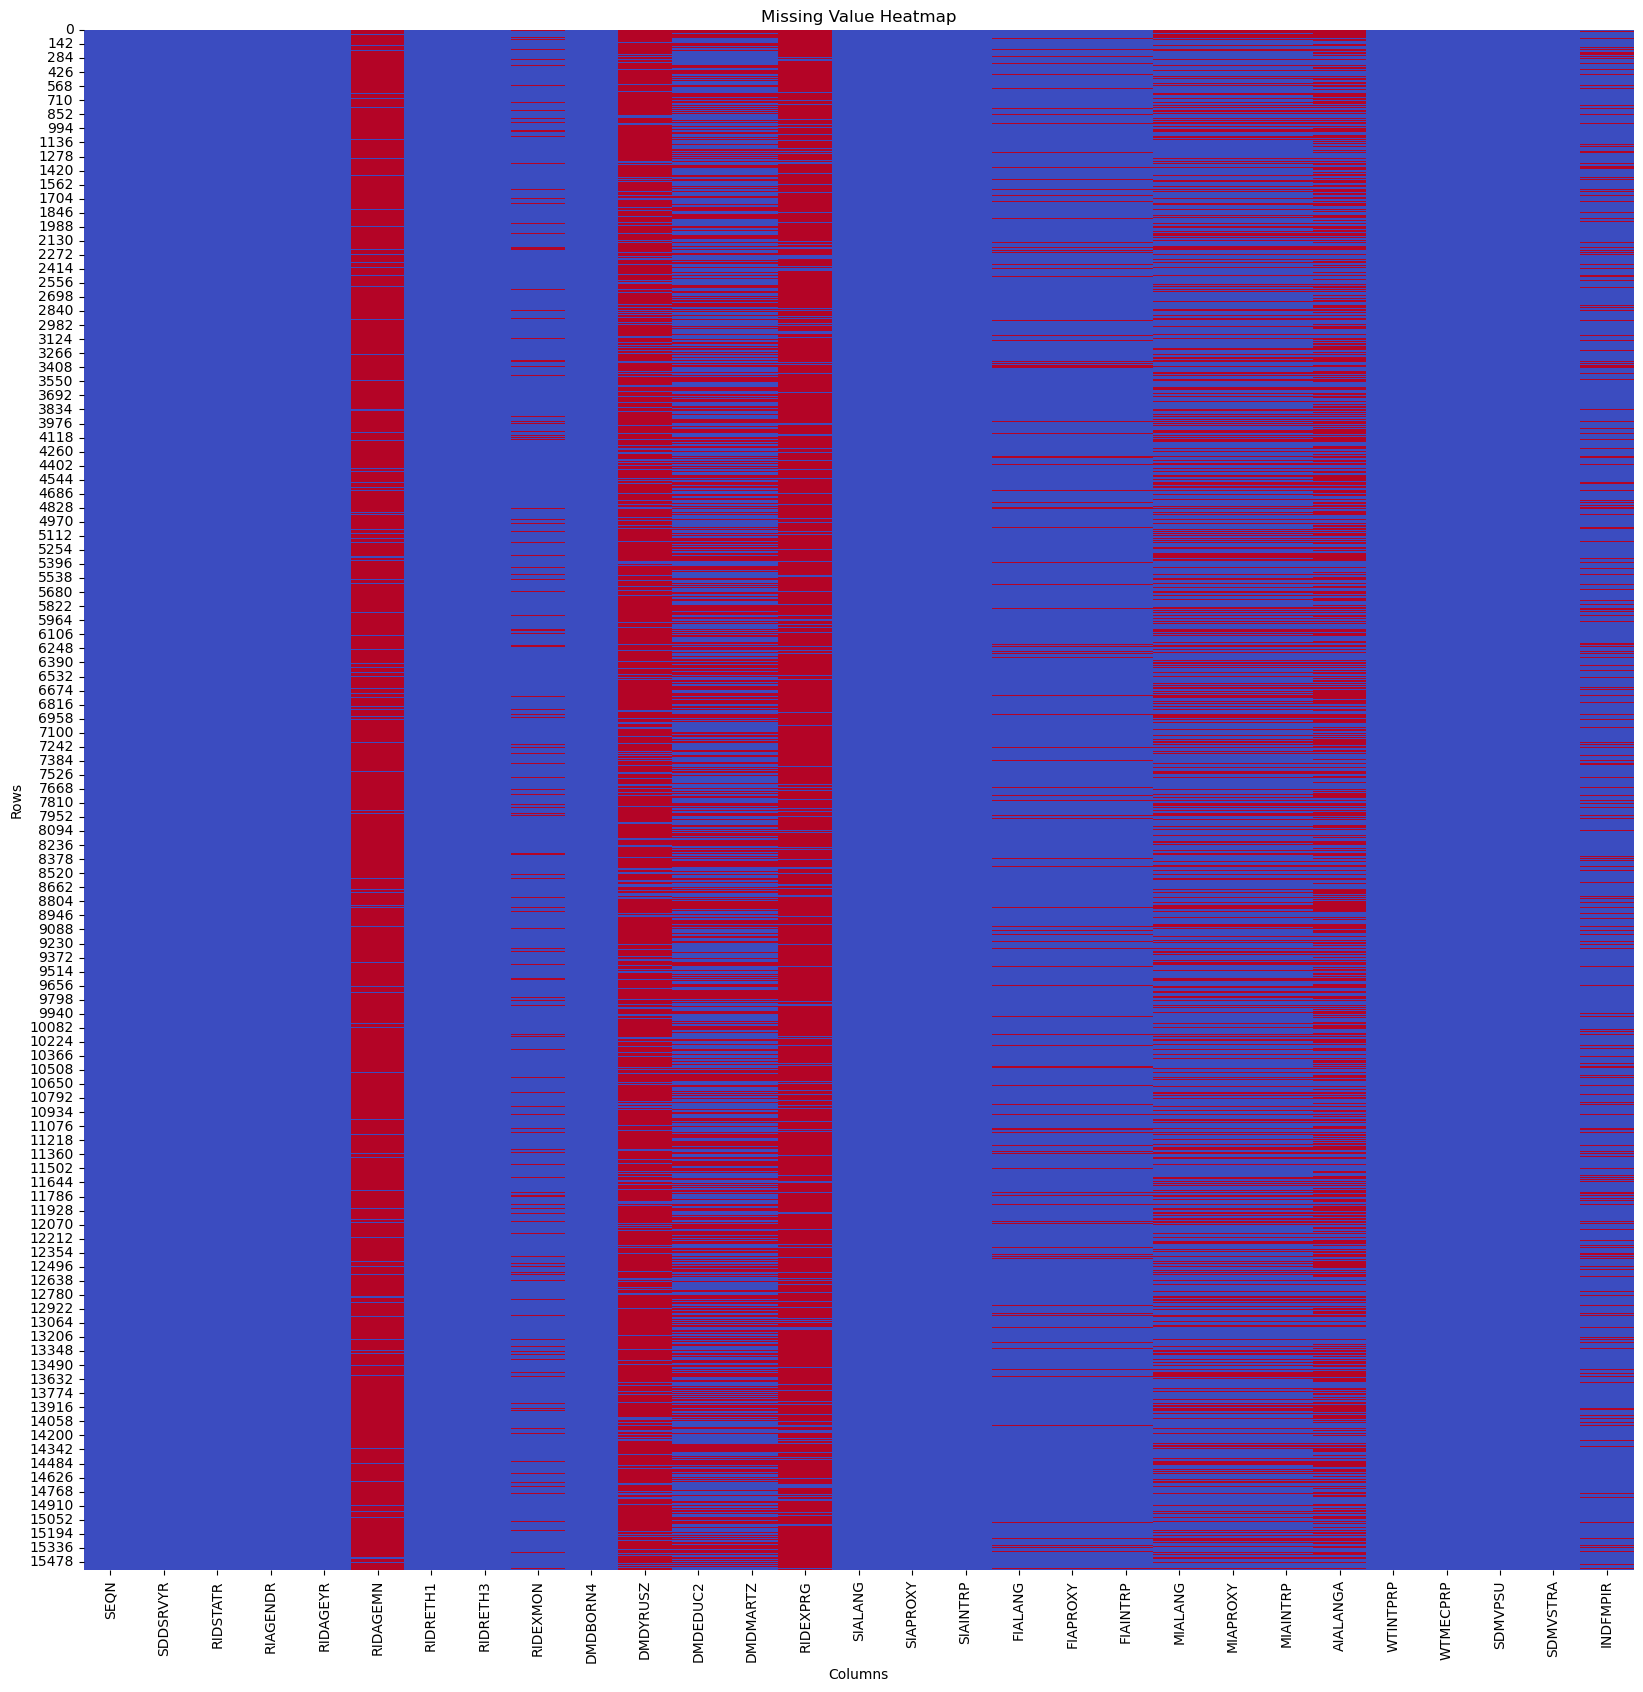

In [10]:
# heatmap to visualize missing values
plt.figure(figsize=(20, 20))
sns.heatmap(data.isnull(), cmap='coolwarm', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Value Heatmap')
plt.show()


In [11]:
# dropping columns with max null values
columns_to_drop = ['RIDAGEMN', 'DMDYRUSZ','RIDEXPRG']
data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDEDUC2,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,5.0,6.0,2.0,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,1.0,1.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,5.0,6.0,2.0,2.0,5.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,2.0,2.0,NaN,2.0,4.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,66.0,2.0,1.0,40.0,4.0,4.0,1.0,1.0,5.0,...,2.0,1.0,2.0,2.0,1.0,21586.596728,2.166689e+04,1.0,166.0,3.82
15556,124819.0,66.0,2.0,1.0,2.0,4.0,4.0,2.0,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,1664.919253,1.838170e+03,2.0,171.0,0.07
15557,124820.0,66.0,2.0,2.0,7.0,3.0,3.0,2.0,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,14819.783161,1.649781e+04,1.0,157.0,1.22
15558,124821.0,66.0,2.0,1.0,63.0,4.0,4.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,4666.817952,4.853430e+03,1.0,158.0,3.71


In [13]:
# Reading the cholesterol files
hdl = pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_HDL.XPT")
ldl = pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_TRIGLY.XPT")
chl_total= pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_TCHOL.XPT")

In [14]:
hdl

,SEQN,LBDHDD,LBDHDDSI
0,109264.0,72.0,1.86
1,109266.0,56.0,1.45
2,109270.0,47.0,1.22
3,109271.0,33.0,0.85
4,109273.0,42.0,1.09
...,...,...,...
12193,124817.0,60.0,1.55
12194,124818.0,50.0,1.29
12195,124820.0,64.0,1.66
12196,124821.0,44.0,1.14


In [15]:
ldl

,SEQN,WTSAFPRP,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
0,109264.0,27533.174559,40.0,0.452,86.0,2.224,82.0,2.121,85.0,2.198
1,109271.0,18100.965319,84.0,0.948,97.0,2.508,96.0,2.483,98.0,2.534
2,109274.0,16281.758327,133.0,1.502,49.0,1.267,54.0,1.396,52.0,1.345
3,109277.0,32230.046209,24.0,0.271,64.0,1.655,62.0,1.603,61.0,1.577
4,109282.0,79007.100787,132.0,1.490,164.0,4.241,163.0,4.215,166.0,4.293
...,...,...,...,...,...,...,...,...,...,...
5085,124813.0,31057.927370,45.0,0.508,96.0,2.483,92.0,2.379,95.0,2.457
5086,124814.0,9339.898841,74.0,0.835,160.0,4.138,158.0,4.086,162.0,4.189
5087,124815.0,75210.175082,38.0,0.429,128.0,3.310,124.0,3.207,129.0,3.336
5088,124821.0,10704.467871,51.0,0.576,101.0,2.612,98.0,2.534,100.0,2.586


In [16]:
chl_total

,SEQN,LBXTC,LBDTCSI
0,109264.0,166.0,4.29
1,109266.0,195.0,5.04
2,109270.0,103.0,2.66
3,109271.0,147.0,3.80
4,109273.0,164.0,4.24
...,...,...,...
12193,124817.0,200.0,5.17
12194,124818.0,234.0,6.05
12195,124820.0,179.0,4.63
12196,124821.0,155.0,4.01


In [17]:
# dropping "Common Unit" columns 
chl_total.drop(['LBXTC'], axis=1, inplace=True)
hdl.drop(['LBDHDD'],axis=1,inplace=True)
ldl.drop(['LBXTR','LBDLDL','LBDLDLM','LBDLDLN'],axis=1,inplace=True)

In [18]:
# merging hdl,ldl,chl to the main demographics dataset
merged_df = data.merge(hdl, on='SEQN', how='inner')


In [19]:
merged_df=merged_df.merge(ldl,on='SEQN',how='inner')

In [20]:
merged_df=merged_df.merge(chl_total,on='SEQN',how='inner')

In [21]:
merged_df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDEDUC2,...,SDMVPSU,SDMVSTRA,INDFMPIR,LBDHDDSI,WTSAFPRP,LBDTRSI,LBDLDLSI,LBDLDMSI,LBDLDNSI,LBDTCSI
0,109264.0,66.0,2.0,2.0,13.0,1.0,1.0,2.0,1.0,NaN,...,1.0,155.0,0.83,1.86,27533.174559,0.452,2.224,2.121,2.198,4.29
1,109271.0,66.0,2.0,1.0,49.0,3.0,3.0,2.0,1.0,2.0,...,1.0,167.0,NaN,0.85,18100.965319,0.948,2.508,2.483,2.534,3.80
2,109274.0,66.0,2.0,1.0,68.0,5.0,7.0,1.0,1.0,4.0,...,2.0,167.0,1.20,0.75,16281.758327,1.502,1.267,1.396,1.345,2.72
3,109277.0,66.0,2.0,2.0,12.0,1.0,1.0,1.0,1.0,NaN,...,2.0,161.0,1.35,1.55,32230.046209,0.271,1.655,1.603,1.577,3.34
4,109282.0,66.0,2.0,1.0,76.0,3.0,3.0,2.0,1.0,5.0,...,2.0,164.0,3.61,1.11,79007.100787,1.490,4.241,4.215,4.293,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,124813.0,66.0,2.0,2.0,43.0,4.0,4.0,1.0,2.0,5.0,...,2.0,171.0,NaN,1.34,31057.927370,0.508,2.483,2.379,2.457,4.06
5086,124814.0,66.0,2.0,1.0,64.0,4.0,4.0,2.0,1.0,3.0,...,1.0,171.0,2.00,1.29,9339.898841,0.835,4.138,4.086,4.189,5.82
5087,124815.0,66.0,2.0,1.0,52.0,4.0,4.0,2.0,1.0,4.0,...,1.0,172.0,5.00,1.73,75210.175082,0.429,3.310,3.207,3.336,5.25
5088,124821.0,66.0,2.0,1.0,63.0,4.0,4.0,1.0,1.0,2.0,...,1.0,158.0,3.71,1.14,10704.467871,0.576,2.612,2.534,2.586,4.01


In [22]:
#Reading blood pressure and supplement intake files
bp = pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_BPXO.XPT")
sup_intake_30 = pd.read_sas("C:/Users/hari shivani gudi/Downloads/P_DSQTOT.XPT")

In [23]:
bp

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,109264.0,b'R',3.0,109.0,67.0,109.0,68.0,106.0,66.0,94.0,95.0,91.0
1,109266.0,b'R',4.0,99.0,56.0,99.0,55.0,99.0,52.0,68.0,66.0,66.0
2,109270.0,b'R',3.0,123.0,73.0,124.0,77.0,127.0,70.0,95.0,98.0,93.0
3,109271.0,b'R',4.0,102.0,65.0,108.0,68.0,111.0,68.0,73.0,71.0,70.0
4,109273.0,b'R',3.0,116.0,68.0,110.0,66.0,115.0,68.0,71.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11651,124815.0,b'R',4.0,141.0,87.0,138.0,86.0,141.0,87.0,56.0,56.0,58.0
11652,124817.0,b'R',4.0,111.0,69.0,112.0,67.0,113.0,66.0,70.0,70.0,72.0
11653,124818.0,b'R',4.0,106.0,67.0,108.0,65.0,95.0,70.0,120.0,119.0,118.0
11654,124821.0,b'R',3.0,121.0,66.0,122.0,67.0,129.0,67.0,60.0,61.0,61.0


In [24]:
sup_intake_30

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,...,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
0,109263.0,2.000000e+00,5.397605e-79,1.0,2.0,18.0,NaN,3.5,3.0,NaN,...,NaN,NaN,NaN,1.4000,NaN,2.5,NaN,NaN,NaN,21.0
1,109264.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109267.0,1.000000e+00,5.397605e-79,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,1.000000e+00,5.397605e-79,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,181.67,166.67,26.667,18.3333,1.5,NaN,133.333,91.67,NaN,250.0
15556,124819.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,1.000000e+00,5.397605e-79,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,1.000000e+00,5.397605e-79,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,39.33,28.67,5.333,4.5000,0.6,NaN,12.000,0.33,NaN,40.0


In [25]:
bp.drop(['BPAOARM','BPAOCSZ','BPXOSY1','BPXODI1','BPXOSY3','BPXODI3','BPXOPLS1','BPXOPLS3'],axis=1,inplace=True)

In [26]:
# merging blood pressure and supplement intake columns to the main demographics dataset 
merged_df=merged_df.merge(bp,on='SEQN',how='inner')

In [27]:
merged_df=merged_df.merge(sup_intake_30,on='SEQN',how='inner')

In [28]:
merged_df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDEDUC2,...,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
0,109264.0,66.0,2.0,2.0,13.0,1.0,1.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109271.0,66.0,2.0,1.0,49.0,3.0,3.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109274.0,66.0,2.0,1.0,68.0,5.0,7.0,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109277.0,66.0,2.0,2.0,12.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN
4,109282.0,66.0,2.0,1.0,76.0,3.0,3.0,2.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085,124813.0,66.0,2.0,2.0,43.0,4.0,4.0,1.0,2.0,5.0,...,NaN,NaN,7.500,12.500,NaN,NaN,NaN,58.33,NaN,125.0
5086,124814.0,66.0,2.0,1.0,64.0,4.0,4.0,2.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5087,124815.0,66.0,2.0,1.0,52.0,4.0,4.0,2.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5088,124821.0,66.0,2.0,1.0,63.0,4.0,4.0,1.0,1.0,2.0,...,39.33,28.67,5.333,4.500,0.6,NaN,12.0,0.33,NaN,40.0


# # HDL

In [29]:
df = pd.DataFrame(merged_df)

male_df = df[df['RIAGENDR'] == "1"]   #male

female_df = df[df['RIAGENDR'] == "2"]  #female

selected_columns = df[['RIAGENDR', 'LBDHDDSI']]

columns_to_keep = ['RIAGENDR', 'LBDHDDSI',"WTINTPRP"]
df_G_hdl = df[columns_to_keep]


In [30]:
df_G_hdl

,RIAGENDR,LBDHDDSI,WTINTPRP
0,2.0,1.86,11689.747264
1,1.0,0.85,8481.589837
2,1.0,0.75,7227.993241
3,2.0,1.55,16385.743307
4,1.0,1.11,28363.015286
...,...,...,...
5085,2.0,1.34,10608.747788
5086,1.0,1.29,3686.240810
5087,1.0,1.73,24851.430976
5088,1.0,1.14,4666.817952


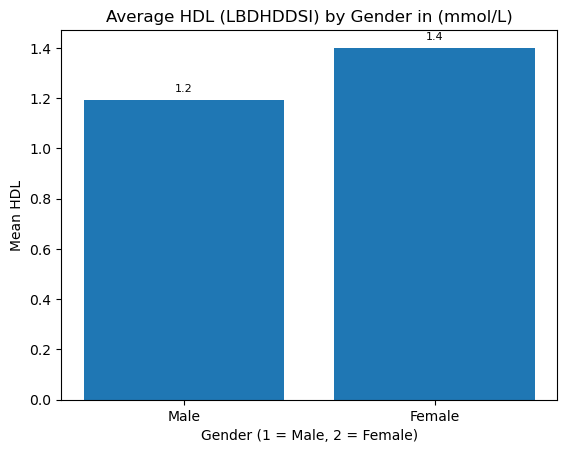

In [31]:
# Grouping by "RIAGENDR" and calculating weighted mean of "LBDHDDSI" for each gender
grouped = df_G_hdl.groupby("RIAGENDR")["LBDHDDSI"].mean()

# weighted means
weighted_means = df_G_hdl.groupby("RIAGENDR").apply(lambda x: (x["LBDHDDSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())


ax = plt.bar(grouped.index, weighted_means)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Mean HDL")
plt.xticks([1, 2], ["Male", "Female"])
plt.title("Average HDL (LBDHDDSI) by Gender in (mmol/L)")


for i, v in enumerate(weighted_means):
    plt.text(i + 1, v + 0.03, str(round(v, 1)), ha='center', fontsize=8)

plt.show()


In [32]:
# Race (1-mexican american,2-other hispanic,3-non-hispanic white,4-non-hispanic black,6-non-hispanic asian,7-other)
columns_to_keep = ['RIDRETH3', 'LBDHDDSI','WTINTPRP']
df_race_hdl = merged_df[columns_to_keep]

In [33]:
df_race_hdl['RIDRETH3'].unique()

array([1., 3., 7., 6., 4., 2.])

In [34]:
df_race_hdl

,RIDRETH3,LBDHDDSI,WTINTPRP
0,1.0,1.86,11689.747264
1,3.0,0.85,8481.589837
2,7.0,0.75,7227.993241
3,1.0,1.55,16385.743307
4,3.0,1.11,28363.015286
...,...,...,...
5085,4.0,1.34,10608.747788
5086,4.0,1.29,3686.240810
5087,4.0,1.73,24851.430976
5088,4.0,1.14,4666.817952


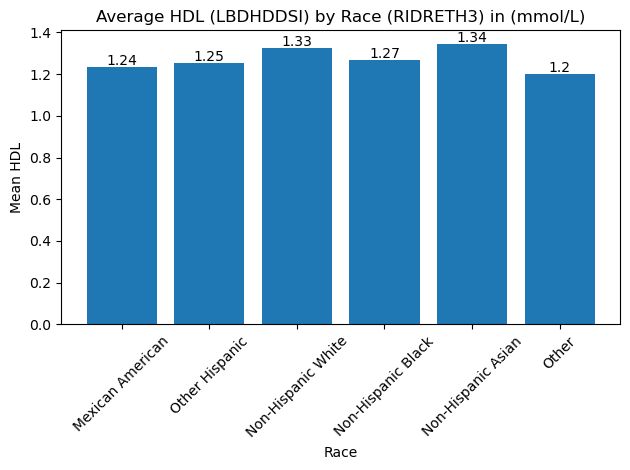

In [35]:
# weighted means by grouping by "RIDRETH3"
grouped_race = df_race_hdl.groupby("RIDRETH3").apply(lambda x: (x["LBDHDDSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

# race category labels
race_labels = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other"]

ax = plt.bar(range(len(grouped_race)), grouped_race.values, tick_label=race_labels)
plt.xlabel("Race")
plt.ylabel("Mean HDL")
plt.xticks(rotation=45)
plt.title("Average HDL (LBDHDDSI) by Race (RIDRETH3) in (mmol/L)")
plt.tight_layout()


for i, v in enumerate(grouped_race.values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.show()


# LDL

In [36]:
df = pd.DataFrame(merged_df)

male_df = df[df['RIAGENDR'] == "1"]   #male


female_df = df[df['RIAGENDR'] == "2"]  #female

selected_columns = df[['RIAGENDR', 'LBDLDLSI','WTINTPRP']]

columns_to_keep = ['RIAGENDR', 'LBDLDLSI','WTINTPRP']
df_G_ldl = df[columns_to_keep]


In [37]:
df_G_ldl

,RIAGENDR,LBDLDLSI,WTINTPRP
0,2.0,2.224,11689.747264
1,1.0,2.508,8481.589837
2,1.0,1.267,7227.993241
3,2.0,1.655,16385.743307
4,1.0,4.241,28363.015286
...,...,...,...
5085,2.0,2.483,10608.747788
5086,1.0,4.138,3686.240810
5087,1.0,3.310,24851.430976
5088,1.0,2.612,4666.817952


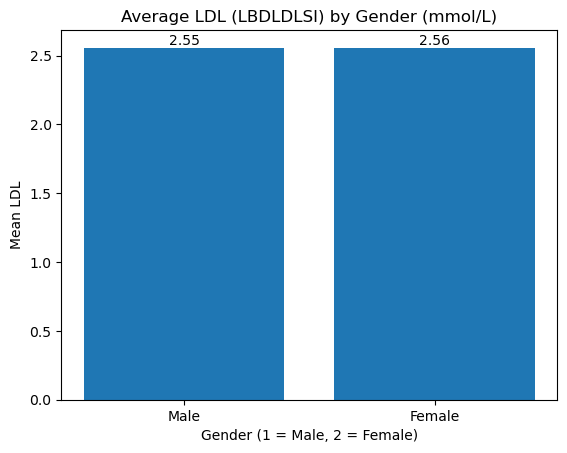

In [38]:


#weighted means of "LBDLDLSI" for each gender
grouped = df_G_ldl.groupby("RIAGENDR").apply(lambda x: (x["LBDLDLSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

ax = plt.bar(grouped.index, grouped.values)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Mean LDL")
plt.xticks([1, 2], ["Male", "Female"])
plt.title("Average LDL (LBDLDLSI) by Gender (mmol/L)")

for i, v in enumerate(grouped.values):
    plt.text(i + 1, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


In [39]:
# Race(1-mexican american,2-other hispanic,3-non-hispanic white,4-non-hispanic black,6-non-hispanic asian,7-other)

columns_to_keep = ['RIDRETH3', 'LBDLDLSI','WTINTPRP']
df_race_ldl = merged_df[columns_to_keep]

In [40]:
df_race_ldl

,RIDRETH3,LBDLDLSI,WTINTPRP
0,1.0,2.224,11689.747264
1,3.0,2.508,8481.589837
2,7.0,1.267,7227.993241
3,1.0,1.655,16385.743307
4,3.0,4.241,28363.015286
...,...,...,...
5085,4.0,2.483,10608.747788
5086,4.0,4.138,3686.240810
5087,4.0,3.310,24851.430976
5088,4.0,2.612,4666.817952


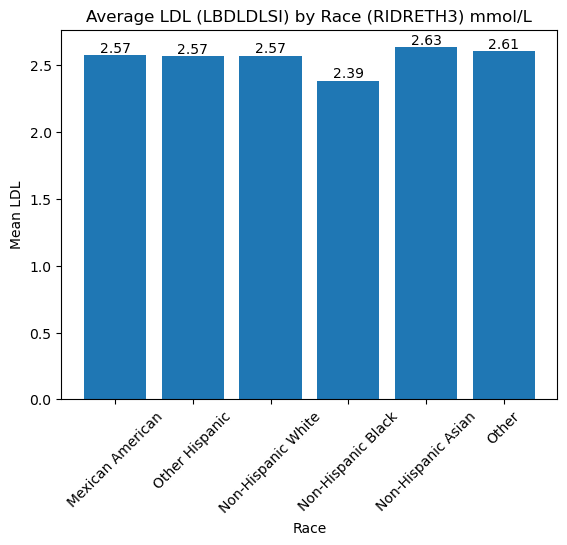

In [41]:
# weighted means by grouping by "RIDRETH3"
grouped_race = df_race_ldl.groupby("RIDRETH3").apply(lambda x: (x["LBDLDLSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

# race category labels
race_labels = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other"]

# Create a bar plot for the weighted means
ax = plt.bar(range(len(grouped_race)), grouped_race.values, tick_label=race_labels)
plt.xlabel("Race")
plt.ylabel("Mean LDL")
plt.xticks(rotation=45)
plt.title("Average LDL (LBDLDLSI) by Race (RIDRETH3) mmol/L")

for i, v in enumerate(grouped_race.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# TOTAL CHOLESTEROL

In [42]:
df = pd.DataFrame(merged_df)

male_df = df[df['RIAGENDR'] == "1"]   #male

female_df = df[df['RIAGENDR'] == "2"]  #female

selected_columns = df[['RIAGENDR', 'LBDTCSI','WTINTPRP']]

columns_to_keep = ['RIAGENDR', 'LBDTCSI','WTINTPRP']
df_G_chl_total = df[columns_to_keep]


In [43]:
df_G_chl_total

,RIAGENDR,LBDTCSI,WTINTPRP
0,2.0,4.29,11689.747264
1,1.0,3.80,8481.589837
2,1.0,2.72,7227.993241
3,2.0,3.34,16385.743307
4,1.0,6.03,28363.015286
...,...,...,...
5085,2.0,4.06,10608.747788
5086,1.0,5.82,3686.240810
5087,1.0,5.25,24851.430976
5088,1.0,4.01,4666.817952


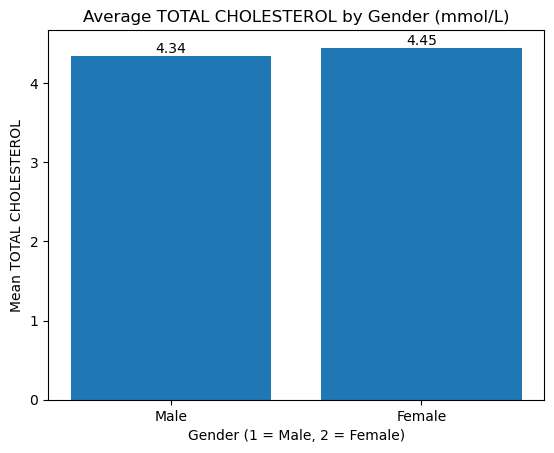

In [44]:
# weighted means of "LBDTCSI" (TOTAL CHOLESTEROL) for each gender
grouped_chl = df_G_chl_total.groupby("RIAGENDR").apply(lambda x: (x["LBDTCSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

ax = plt.bar(grouped_chl.index, grouped_chl.values)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Mean TOTAL CHOLESTEROL")
plt.xticks([1, 2], ["Male", "Female"])
plt.title("Average TOTAL CHOLESTEROL by Gender (mmol/L)")

for i, v in enumerate(grouped_chl.values):
    plt.text(i + 1, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


In [45]:
# Race(1-mexican american,2-other hispanic,3-non-hispanic white,4-non-hispanic black,6-non-hispanic asian,7-other)

columns_to_keep = ['RIDRETH3', 'LBDTCSI','WTINTPRP']
df_race_chl_total = merged_df[columns_to_keep]


In [46]:
df_race_chl_total

,RIDRETH3,LBDTCSI,WTINTPRP
0,1.0,4.29,11689.747264
1,3.0,3.80,8481.589837
2,7.0,2.72,7227.993241
3,1.0,3.34,16385.743307
4,3.0,6.03,28363.015286
...,...,...,...
5085,4.0,4.06,10608.747788
5086,4.0,5.82,3686.240810
5087,4.0,5.25,24851.430976
5088,4.0,4.01,4666.817952


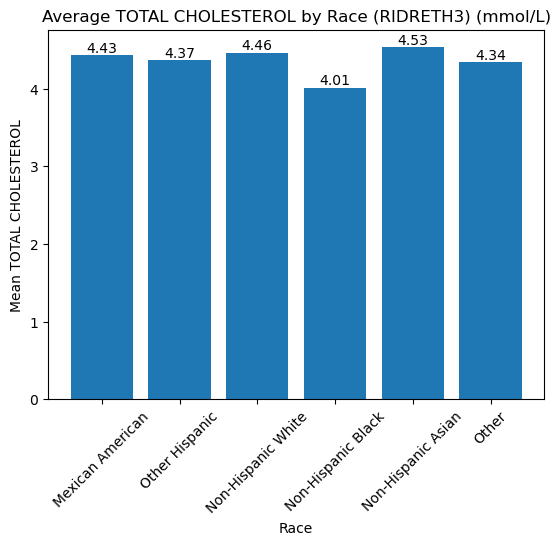

In [47]:
#weighted means by grouping by "RIDRETH3"
grouped_race_chl = df_race_chl_total.groupby("RIDRETH3").apply(lambda x: (x["LBDTCSI"] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

#race category labels
race_labels = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other"]

ax = plt.bar(range(len(grouped_race_chl)), grouped_race_chl.values, tick_label=race_labels)
plt.xlabel("Race")
plt.ylabel("Mean TOTAL CHOLESTEROL")
plt.xticks(rotation=45)
plt.title("Average TOTAL CHOLESTEROL by Race (RIDRETH3) (mmol/L)")

for i, v in enumerate(grouped_race_chl.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


# Supplement Intake

In [48]:
merged_df["RIAGENDR"].unique() #gender

array([2., 1.])

In [49]:
merged_df[['DSQTPROT', 'DSQTCARB', 'DSQTSUGR','WTINTPRP']]

,DSQTPROT,DSQTCARB,DSQTSUGR,WTINTPRP
0,NaN,NaN,NaN,11689.747264
1,NaN,NaN,NaN,8481.589837
2,NaN,NaN,NaN,7227.993241
3,NaN,1.7333,NaN,16385.743307
4,NaN,NaN,NaN,28363.015286
...,...,...,...,...
5085,NaN,NaN,NaN,10608.747788
5086,NaN,NaN,NaN,3686.240810
5087,NaN,NaN,NaN,24851.430976
5088,NaN,NaN,NaN,4666.817952


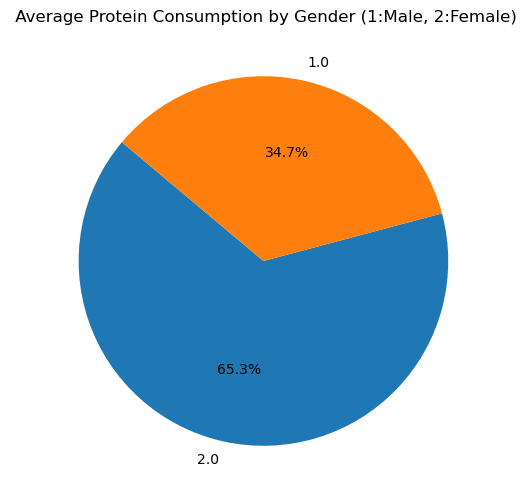

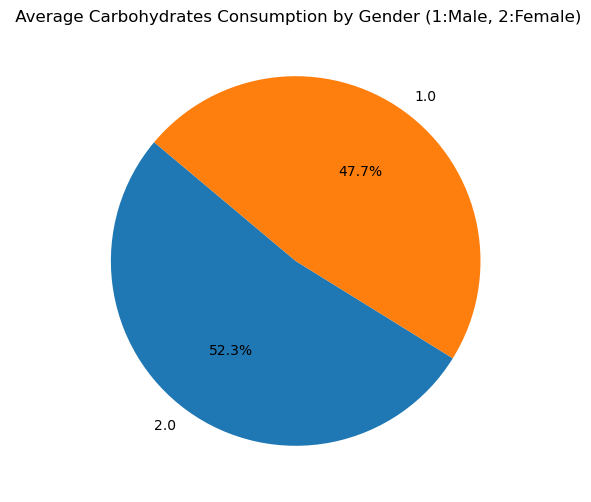

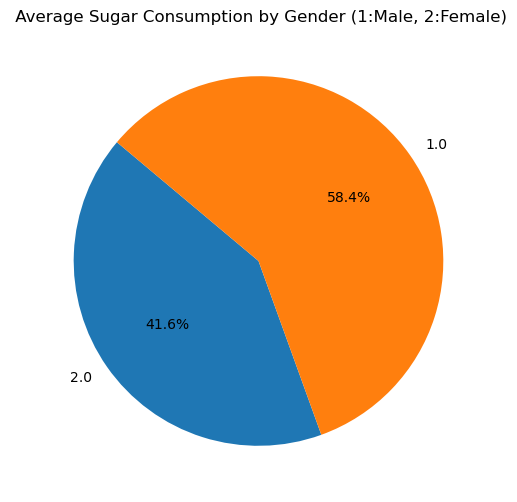

In [50]:
# dictionary to map nutrient names to desired labels
nutrient_labels = {
    'DSQTPROT': 'Protein',
    'DSQTCARB': 'Carbohydrates',
    'DSQTSUGR': 'Sugar'
}

gender = merged_df["RIAGENDR"].unique()


nutrients = ['DSQTPROT', 'DSQTCARB', 'DSQTSUGR']

for nutrient in nutrients:
    plt.figure(figsize=(6, 6))

    # weighted total nutrient consumption for Male and Female
    nutrient_data = merged_df.groupby("RIAGENDR").apply(lambda x: (x[nutrient] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

    plt.pie(nutrient_data, labels=gender, autopct='%1.1f%%', startangle=140)
    plt.title(f" Average {nutrient_labels[nutrient]} Consumption by Gender (1:Male, 2:Female)")

    plt.show()


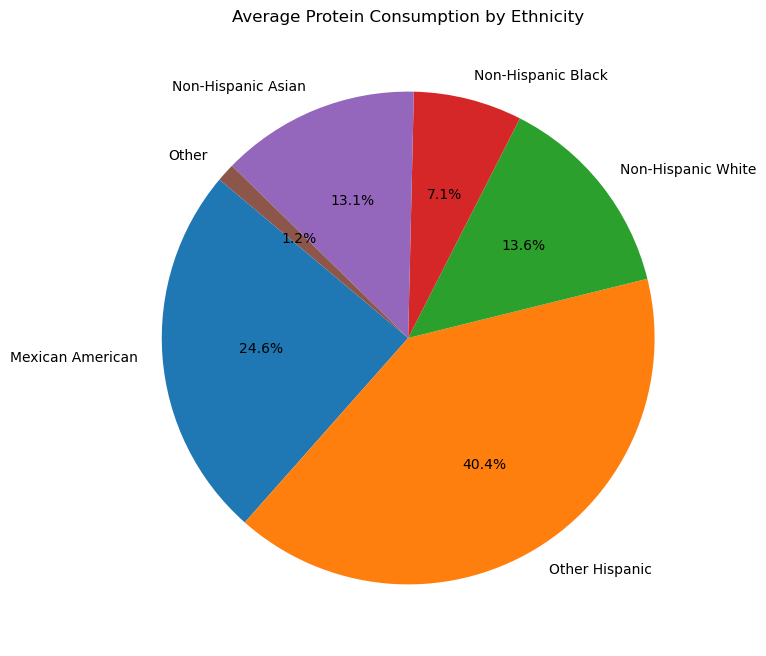

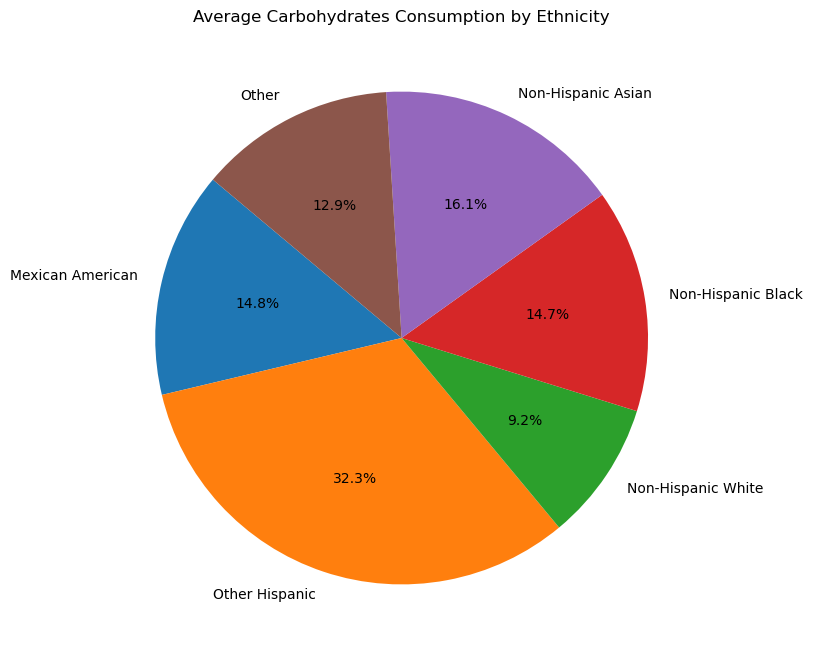

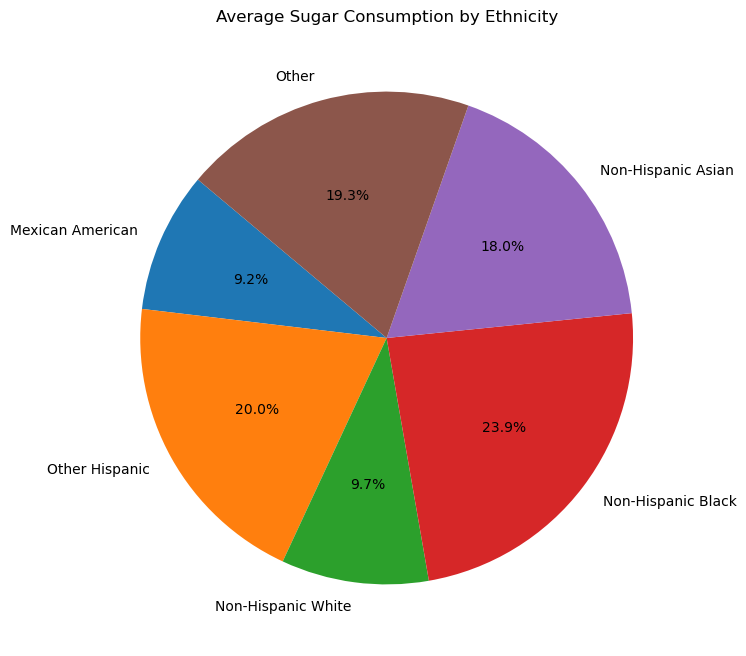

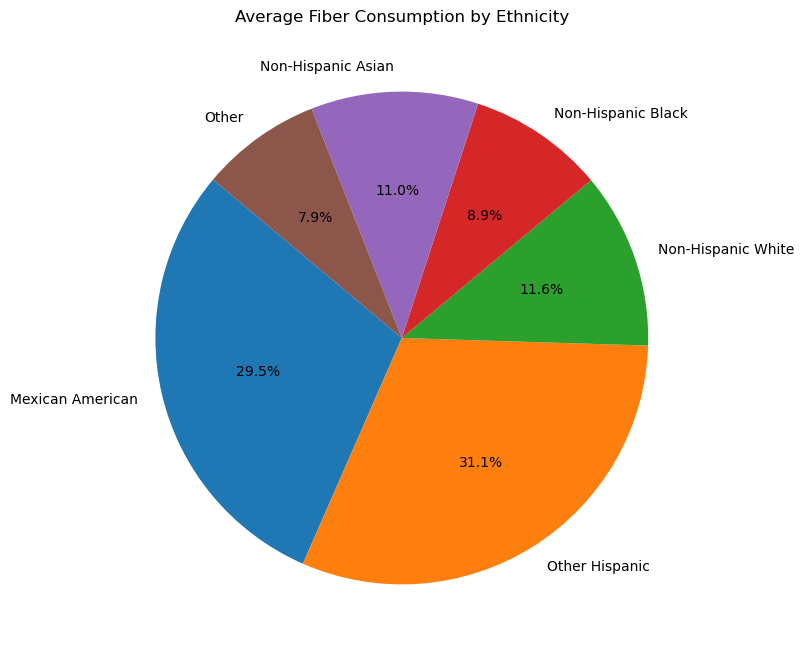

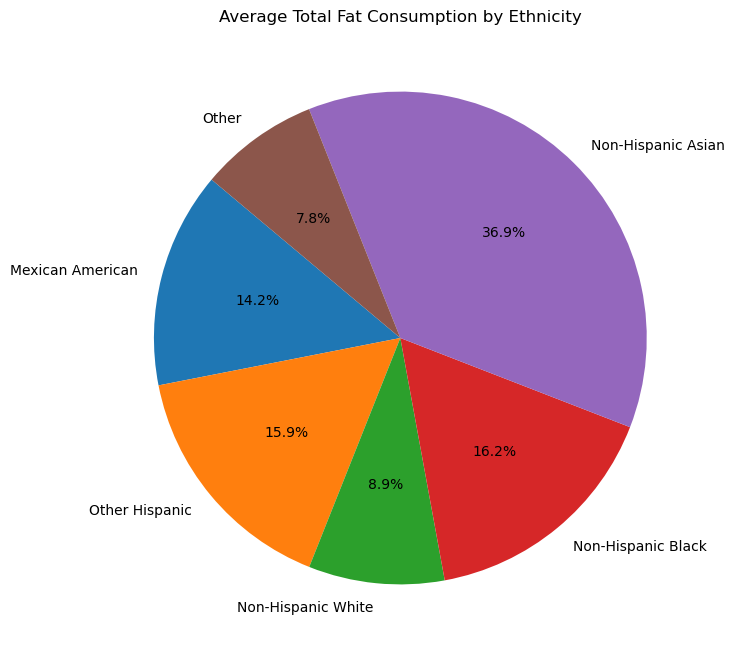

In [51]:
ethnicities = [1, 2, 3, 4, 6, 7]
ethnicity_names = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other"]
nutrients = {
    'DSQTPROT': 'Protein',
    'DSQTCARB': 'Carbohydrates',
    'DSQTSUGR': 'Sugar',
    'DSQTFIBE': 'Fiber',
    'DSQTTFAT': 'Total Fat'
}

# dictionary to map ethnicity codes to names
ethnicity_dict = dict(zip(ethnicities, ethnicity_names))

# weighted mean nutrient consumption for each ethnicity
weighted_means = {nutrient: [] for nutrient in nutrients}

for nutrient, nutrient_name in nutrients.items():
    for ethnicity in ethnicities:
        total_weights = merged_df.loc[merged_df['RIDRETH3'] == ethnicity, 'WTINTPRP'].sum()
        weighted_mean = (merged_df.loc[merged_df['RIDRETH3'] == ethnicity, nutrient].sum() /
                         total_weights)
        weighted_means[nutrient].append(weighted_mean)

for nutrient, nutrient_name in nutrients.items():
    plt.figure(figsize=(8, 8))
    plt.pie(weighted_means[nutrient], labels=[ethnicity_dict[code] for code in ethnicities], autopct='%1.1f%%', startangle=140)
    plt.title(f"Average {nutrient_name} Consumption by Ethnicity")

    plt.show()

# Blood Pressure

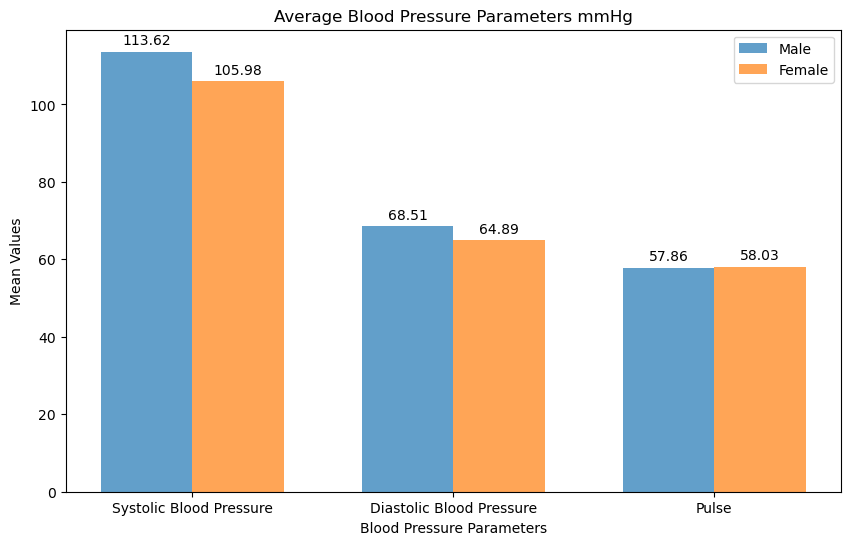

In [52]:
gender = merged_df["RIAGENDR"].unique()
labels = ["BPXOSY2", "BPXODI2", "BPXOPLS2"]

# dictionary to map codes to label names
label_dict = {
    "BPXOSY2": "Systolic Blood Pressure",
    "BPXODI2": "Diastolic Blood Pressure",
    "BPXOPLS2": "Pulse"
}

# Desired columns
data = merged_df[["RIAGENDR"] + labels + ["WTINTPRP"]]

# Male and female data
male_data = data[data["RIAGENDR"] == 1]  # Assuming 1 represents male
female_data = data[data["RIAGENDR"] == 2]  # Assuming 2 represents female

# weighted mean values for males and females
male_weighted_means = []
female_weighted_means = []

for label in labels:
    male_weighted_mean = (male_data[label] * male_data["WTINTPRP"]).sum() / male_data["WTINTPRP"].sum()
    female_weighted_mean = (female_data[label] * female_data["WTINTPRP"]).sum() / female_data["WTINTPRP"].sum()
    
    male_weighted_means.append(male_weighted_mean)
    female_weighted_means.append(female_weighted_mean)

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, male_weighted_means, width, label='Male', alpha=0.7)
bar2 = plt.bar([i + width for i in x], female_weighted_means, width, label='Female', alpha=0.7)

plt.xlabel('Blood Pressure Parameters')
plt.ylabel('Mean Values')
plt.title('Average Blood Pressure Parameters mmHg')
plt.xticks([i + width / 2 for i in x], [label_dict[label] for label in labels])  # Set the labels for each bar
plt.legend()

def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_values(bar1)
add_values(bar2)

plt.show()


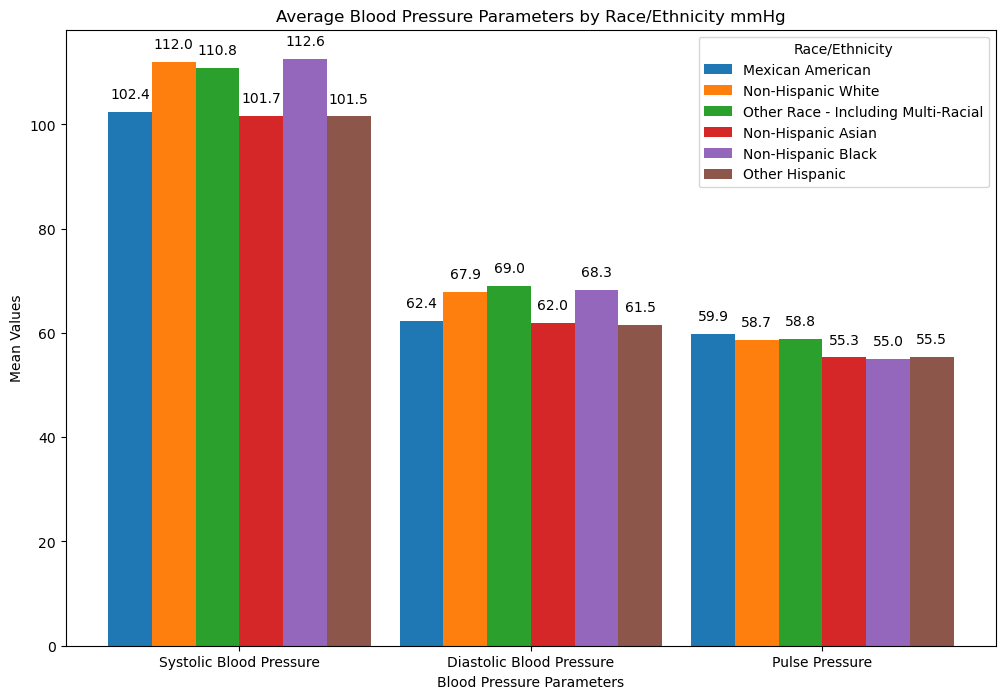

In [53]:
# Unique ethnicities
races = merged_df["RIDRETH3"].unique()
labels = ["BPXOSY2", "BPXODI2", "BPXOPLS2"]

# Dictionary to map column codes to label names
column_labels = {
    "BPXOSY2": "Systolic Blood Pressure",
    "BPXODI2": "Diastolic Blood Pressure",
    "BPXOPLS2": "Pulse Pressure"
}

# Dictionary to map race codes to label names
race_labels = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    6: "Non-Hispanic Asian",
    7: "Other Race - Including Multi-Racial"
}


# Desired columns
data = merged_df[["RIDRETH3"] + labels + ["WTINTPRP"]]

num_bars = len(races)
bar_width = 0.15
index = np.arange(len(labels))

plt.figure(figsize=(12, 8))

for i, race in enumerate(races):
    race_data = data[data["RIDRETH3"] == race]
    
    race_label = race_labels.get(race, f"Race {race}")
    
    # Weighted means for each parameter within each race group
    race_weighted_means = []
    for label in labels:
        weighted_mean = (race_data[label] * race_data["WTINTPRP"]).sum() / race_data["WTINTPRP"].sum()
        race_weighted_means.append(weighted_mean)

    bars = plt.bar(index + i * bar_width, race_weighted_means, bar_width, label=race_label)
    
    for j, bar, value in zip(range(len(labels)), bars, race_weighted_means):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value:.1f}', ha='center', va='bottom')

plt.xlabel('Blood Pressure Parameters')
plt.ylabel('Mean Values')
plt.title('Average Blood Pressure Parameters by Race/Ethnicity mmHg')
plt.xticks(index + (num_bars / 2 - 0.5) * bar_width, [column_labels[label] for label in labels])
plt.legend(title='Race/Ethnicity', loc='upper right')

plt.show()


# Age, Race and Gender Breakouts - Analysis

# Supplement intake - 55+,55-64,65-80

- ### Age

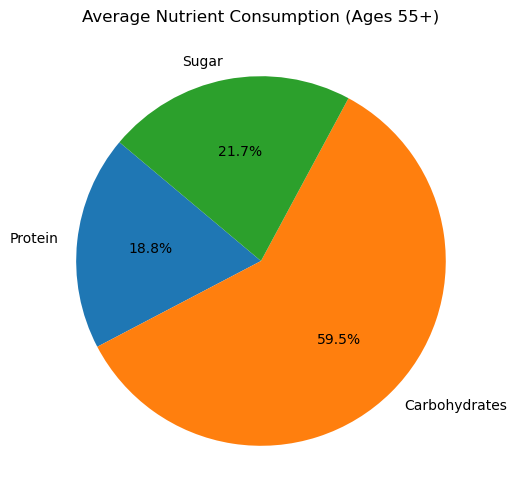

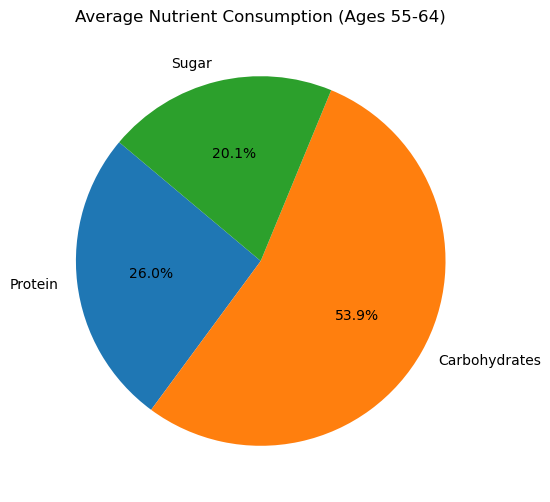

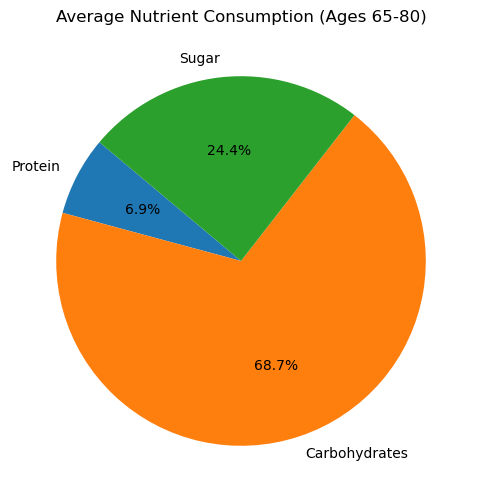

In [54]:
# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

# Nutrients
nutrients = ['DSQTPROT', 'DSQTCARB', 'DSQTSUGR']

# Dictionary to map nutrient names to desired labels
nutrient_labels = {
    'DSQTPROT': 'Protein',
    'DSQTCARB': 'Carbohydrates',
    'DSQTSUGR': 'Sugar'
}

for age_range in age_ranges:
    # Filtering data based on age range
    if np.isinf(age_range[1]):
        data_age_filtered = merged_df[(merged_df['RIDAGEYR'] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        data_age_filtered = merged_df[(merged_df['RIDAGEYR'] >= age_range[0]) & (merged_df['RIDAGEYR'] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    plt.figure(figsize=(6, 6))

    # Weighted total nutrient consumption for individuals in the age range
    nutrient_data = (data_age_filtered[nutrients].multiply(data_age_filtered["WTINTPRP"], axis=0).sum() /
                     data_age_filtered["WTINTPRP"].sum())

    plt.pie(nutrient_data, labels=nutrient_labels.values(), autopct='%1.1f%%', startangle=140)
    plt.title(f"Average Nutrient Consumption ({title_age_range})")

    plt.show()


- ### Age and Gender

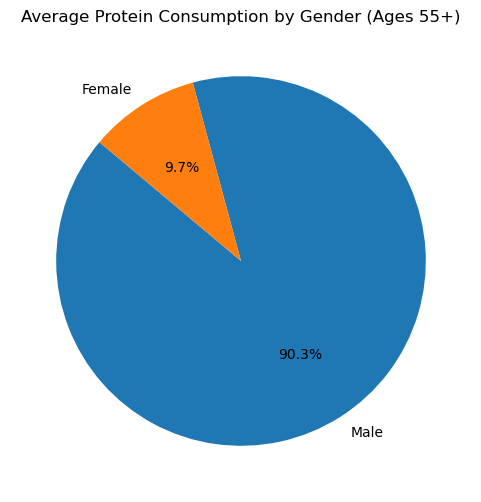

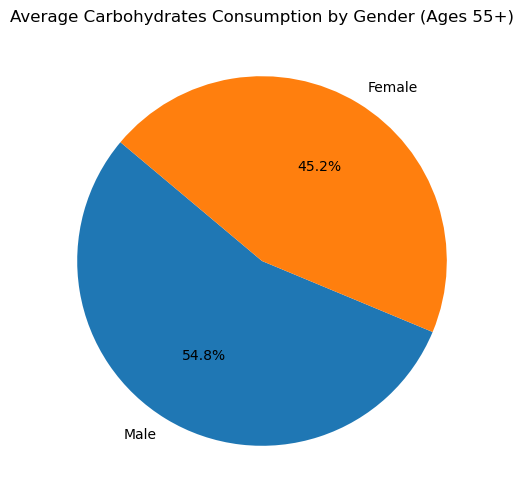

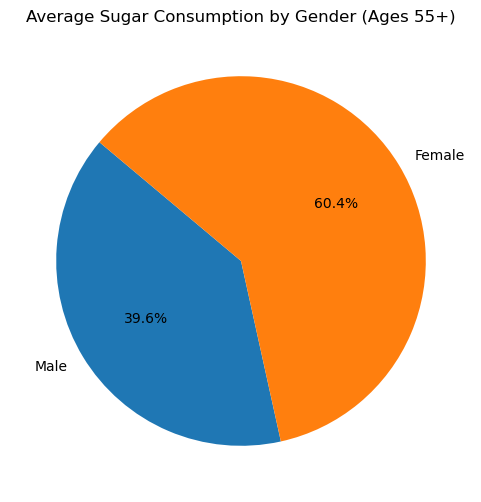

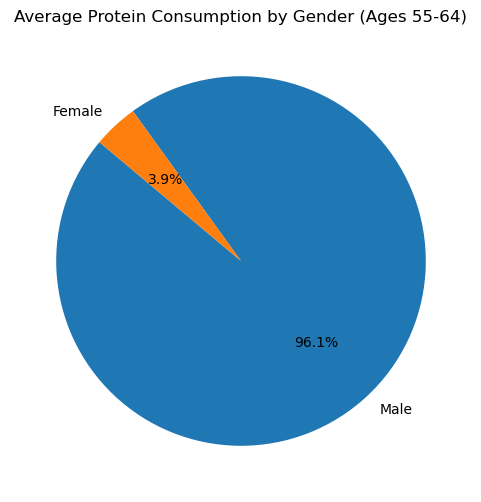

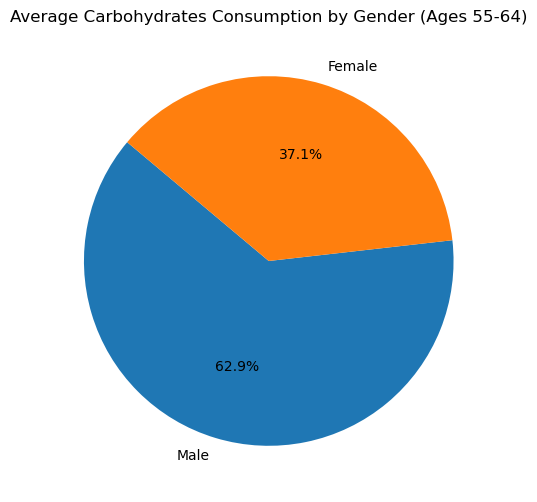

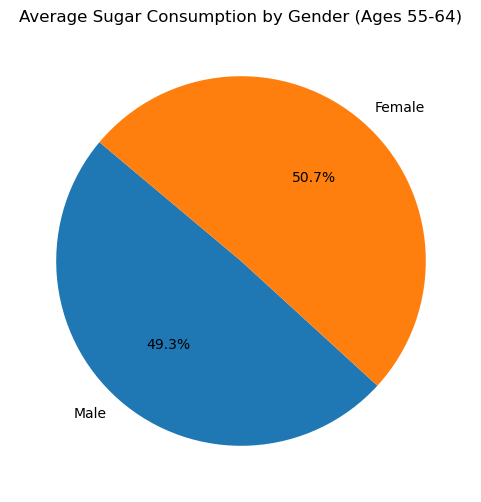

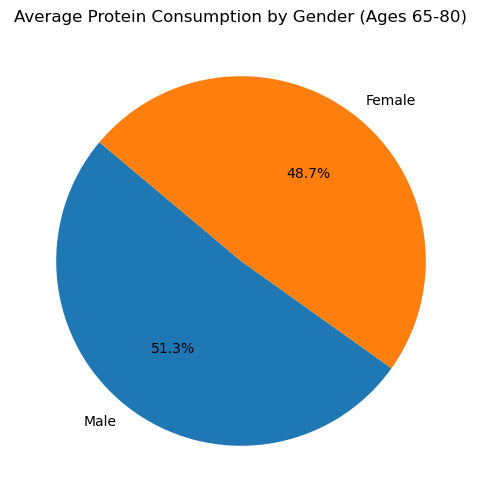

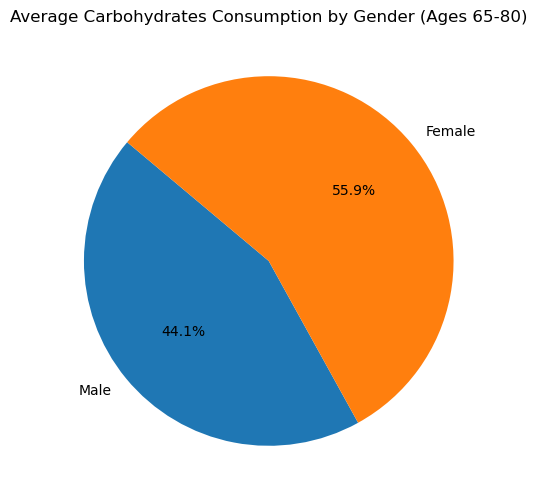

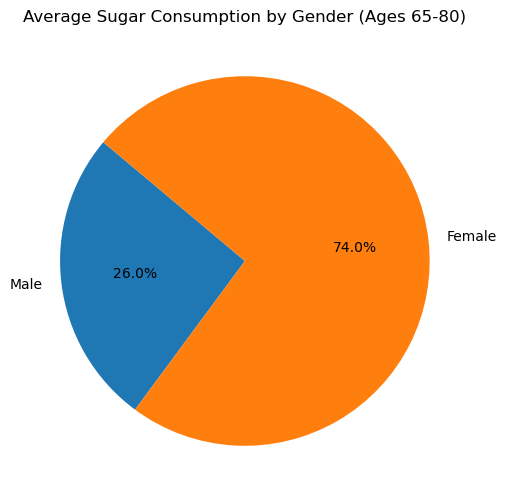

In [55]:
# Dictionary to map nutrient names to desired labels
nutrient_labels = {
    'DSQTPROT': 'Protein',
    'DSQTCARB': 'Carbohydrates',
    'DSQTSUGR': 'Sugar'
}

# Dictionary to map gender codes to labels
gender_labels = {1: 'Male', 2: 'Female'}

# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

# pie charts for each age range
for age_range in age_ranges:
    if np.isinf(age_range[1]):
        filtered_data = merged_df[(merged_df['RIDAGEYR'] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        filtered_data = merged_df[(merged_df['RIDAGEYR'] >= age_range[0]) & (merged_df['RIDAGEYR'] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    nutrients = ['DSQTPROT', 'DSQTCARB', 'DSQTSUGR']

    for nutrient in nutrients:
        plt.figure(figsize=(6, 6))

        nutrient_data = filtered_data.groupby("RIAGENDR").apply(lambda x: (x[nutrient] * x["WTINTPRP"]).sum() / x["WTINTPRP"].sum())

        plt.pie(nutrient_data, labels=gender_labels.values(), autopct='%1.1f%%', startangle=140)
        plt.title(f"Average {nutrient_labels[nutrient]} Consumption by Gender ({title_age_range})")

        plt.show()


- ### Age and Race 

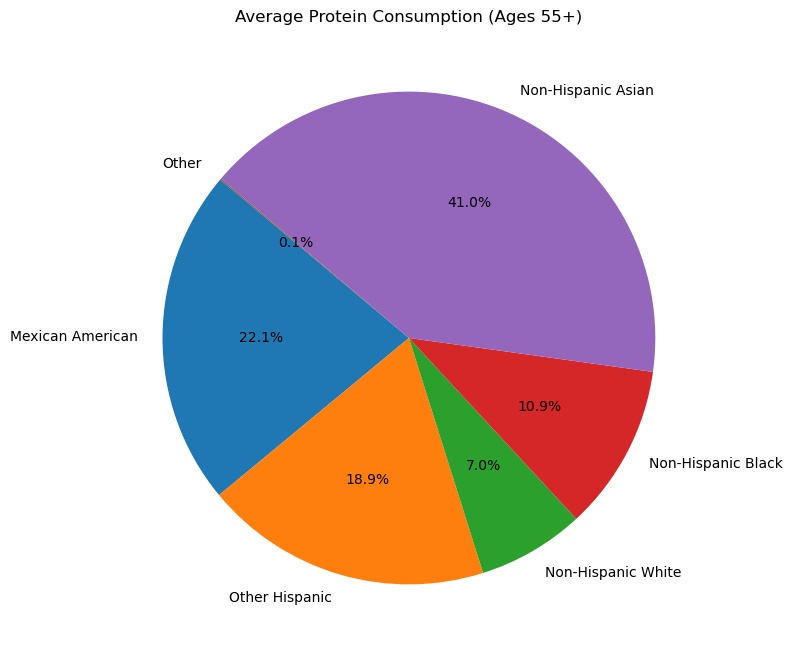

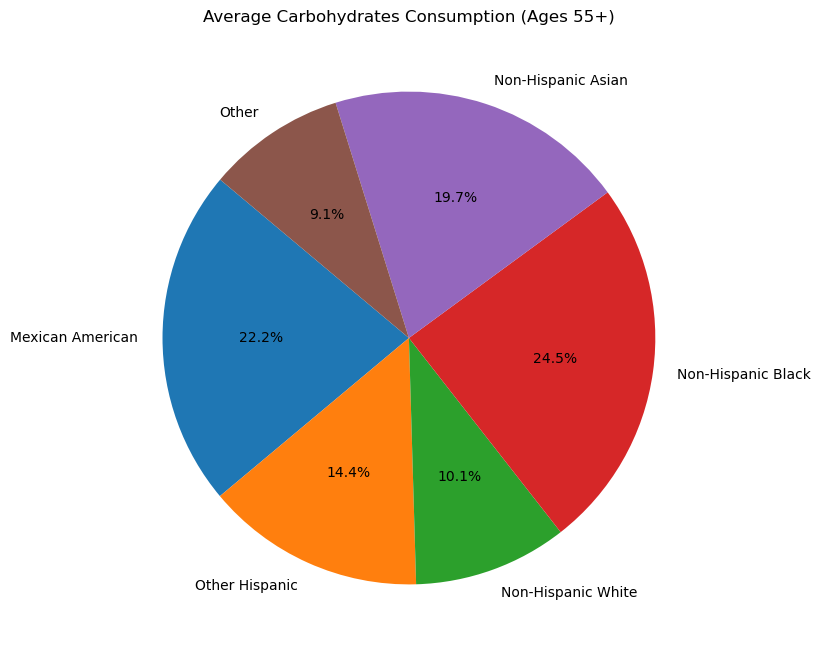

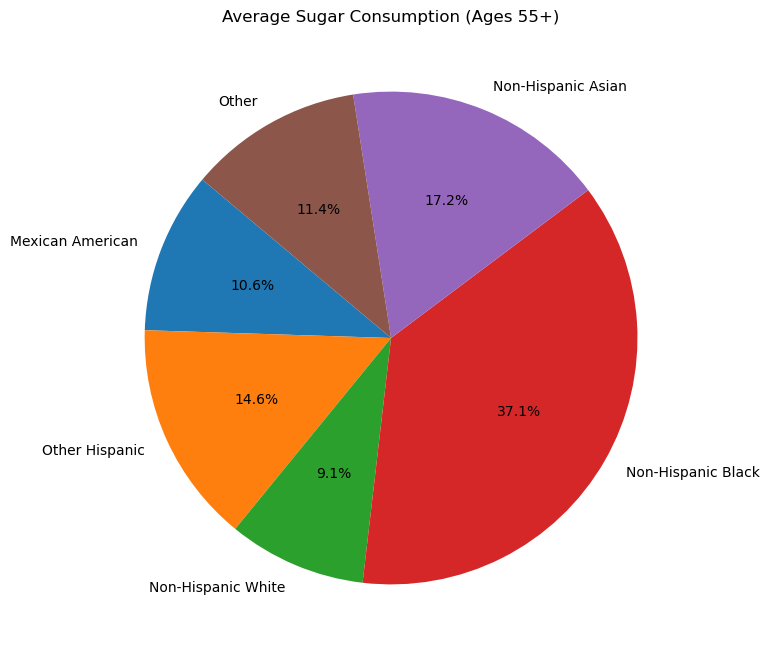

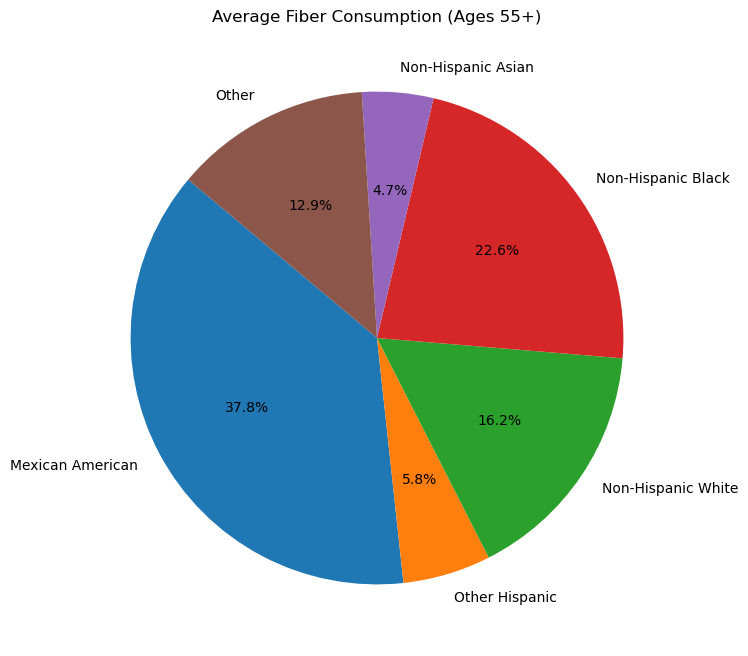

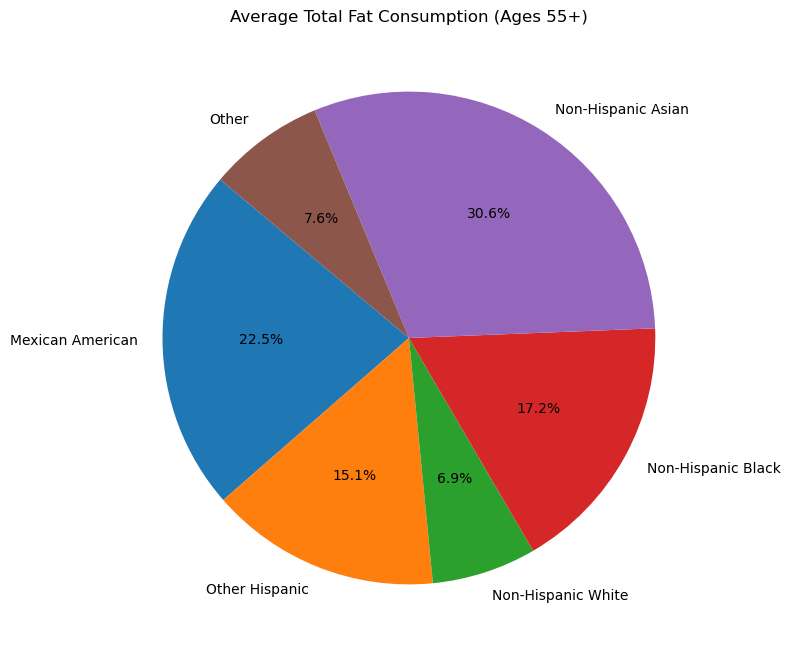

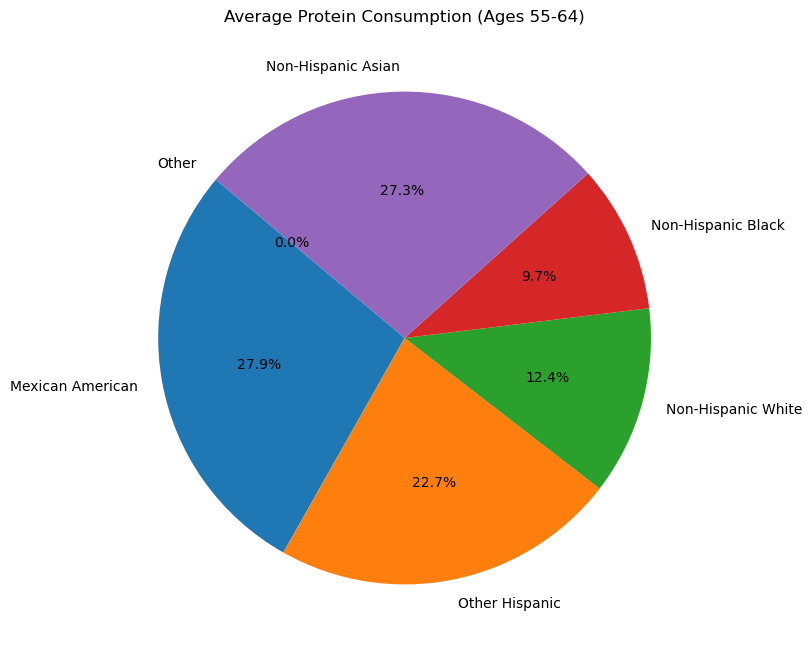

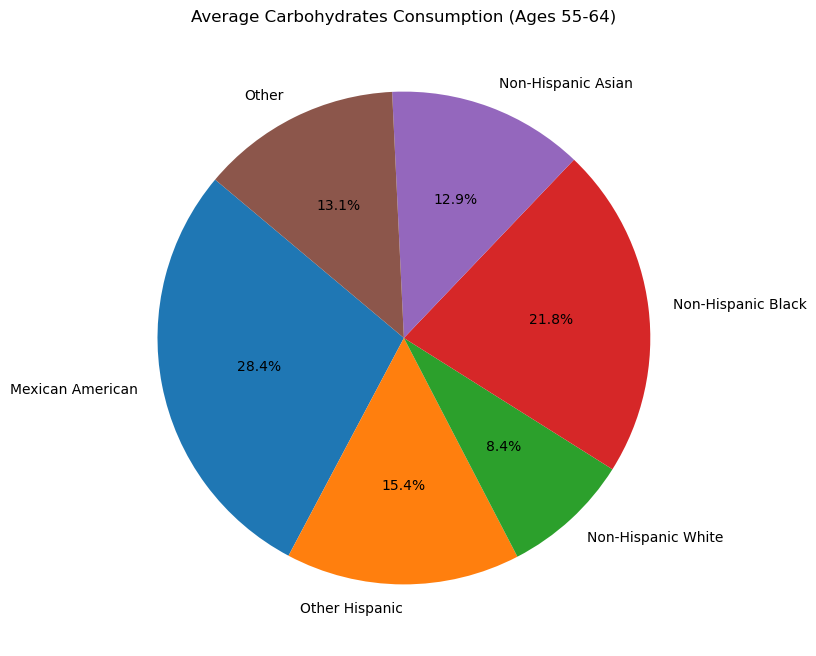

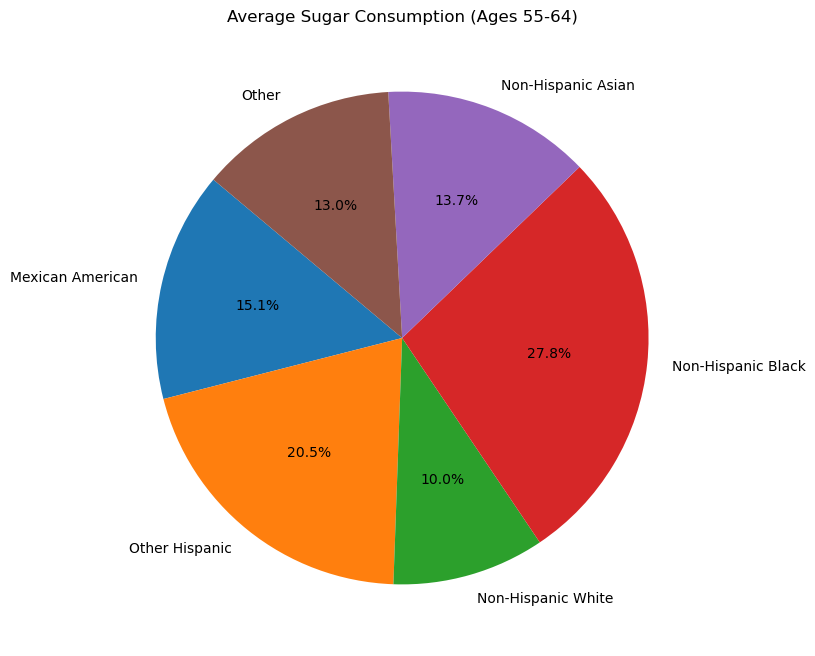

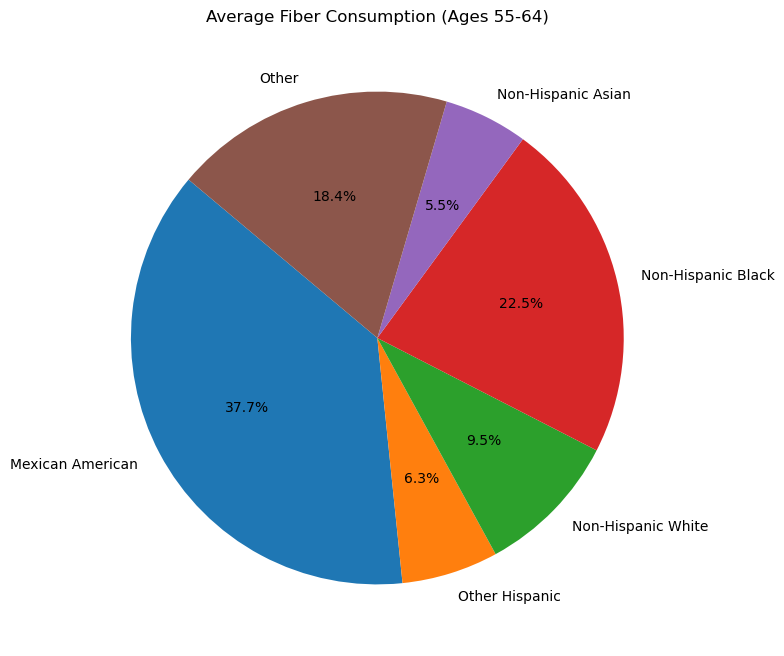

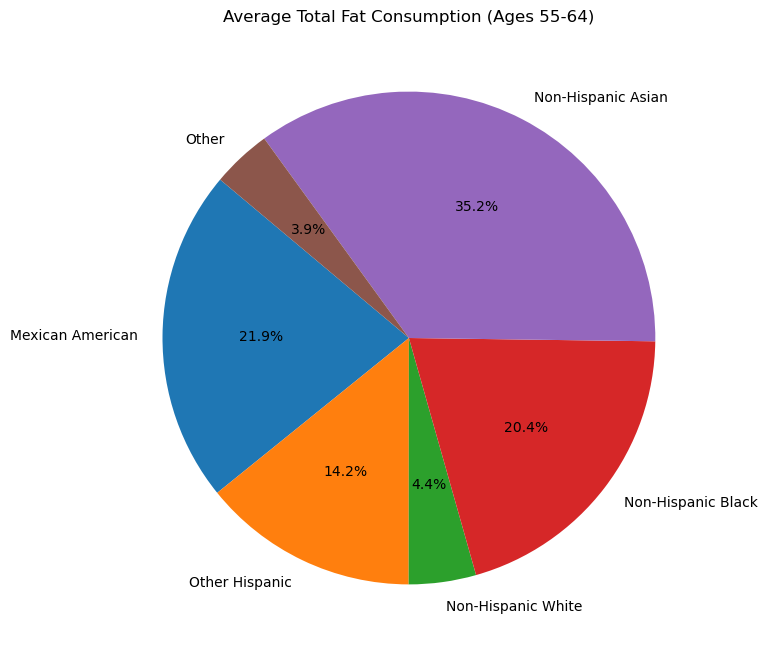

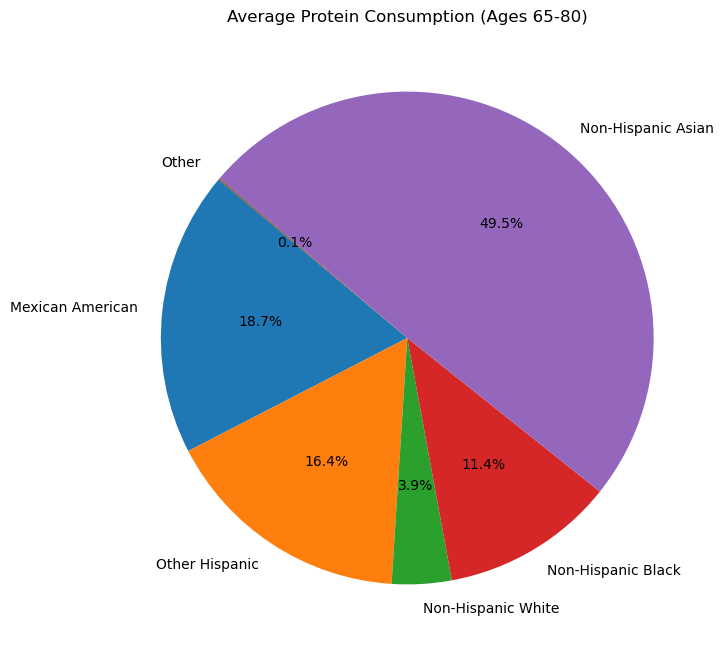

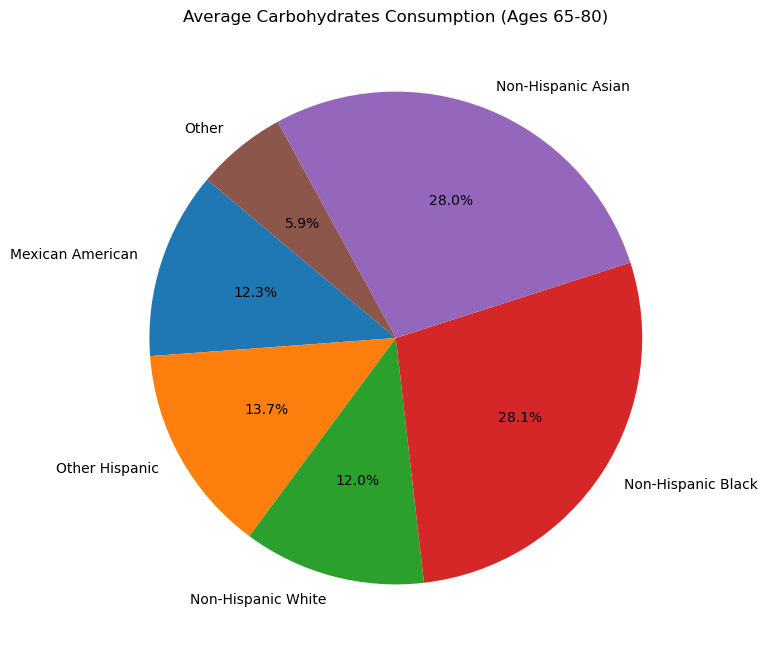

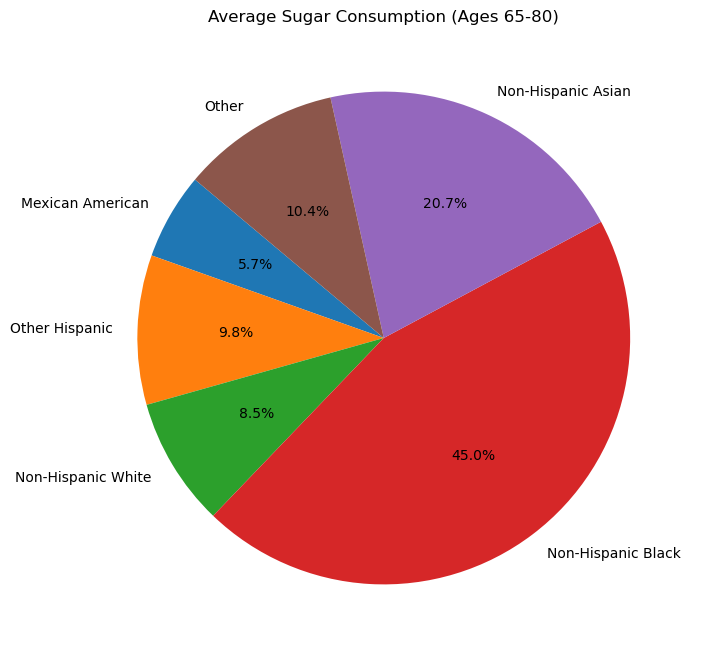

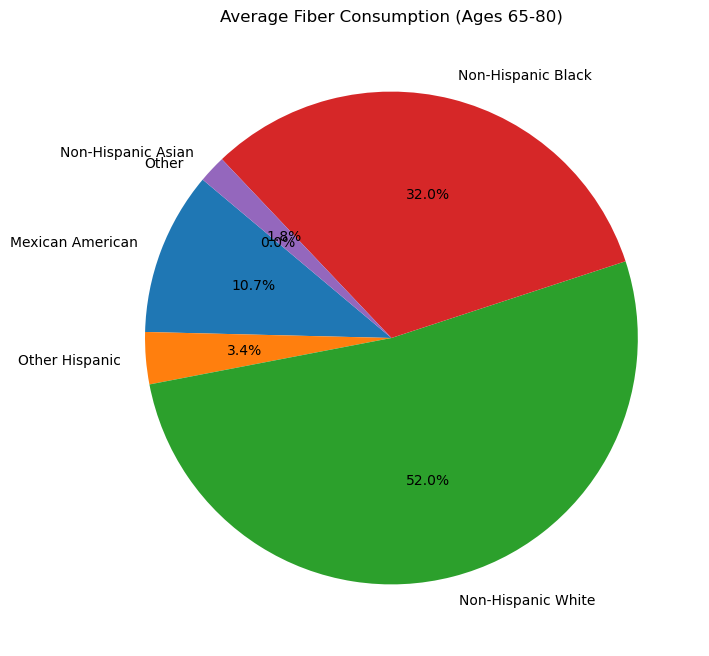

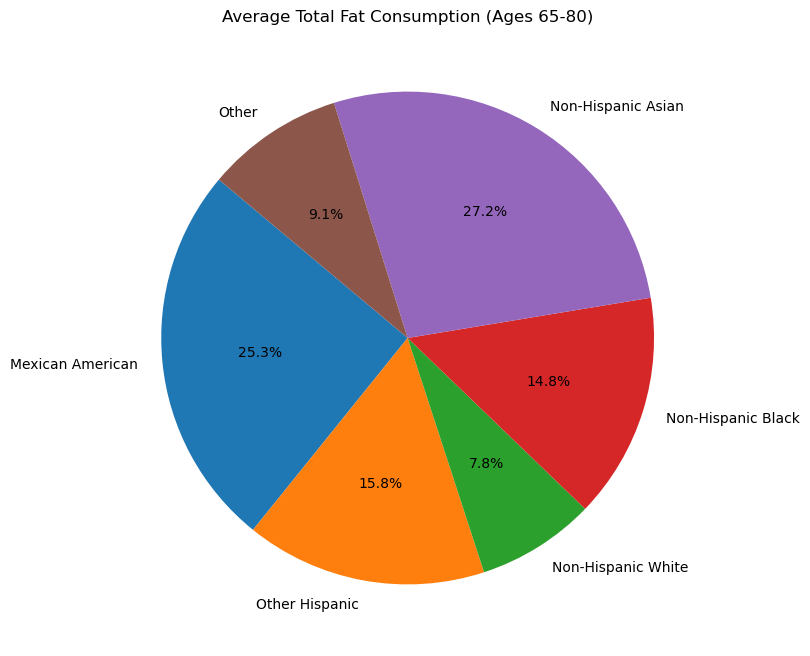

In [56]:
# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

ethnicities = [1, 2, 3, 4, 6, 7]
ethnicity_names = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other"]
nutrients = {
    'DSQTPROT': 'Protein',
    'DSQTCARB': 'Carbohydrates',
    'DSQTSUGR': 'Sugar',
    'DSQTFIBE': 'Fiber',
    'DSQTTFAT': 'Total Fat'
}

# Dictionary to map ethnicity codes to names
ethnicity_dict = dict(zip(ethnicities, ethnicity_names))

for age_range in age_ranges:
    if np.isinf(age_range[1]):
        filtered_data = merged_df[(merged_df['RIDAGEYR'] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        filtered_data = merged_df[(merged_df['RIDAGEYR'] >= age_range[0]) & (merged_df['RIDAGEYR'] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    # Weighted mean nutrient consumption for each ethnicity in the specified age range
    weighted_means = {nutrient: [] for nutrient in nutrients}

    for nutrient, nutrient_name in nutrients.items():
        for ethnicity in ethnicities:
            total_weights = filtered_data.loc[filtered_data['RIDRETH3'] == ethnicity, 'WTINTPRP'].sum()
            weighted_mean = (filtered_data.loc[filtered_data['RIDRETH3'] == ethnicity, nutrient].sum() /
                             total_weights)
            weighted_means[nutrient].append(weighted_mean)

    for nutrient, nutrient_name in nutrients.items():
        plt.figure(figsize=(8, 8))
        plt.pie(weighted_means[nutrient], labels=[ethnicity_dict[code] for code in ethnicities], autopct='%1.1f%%', startangle=140)
        plt.title(f"Average {nutrient_name} Consumption ({title_age_range})")

        plt.show()


# Blood Pressure

- ### Age

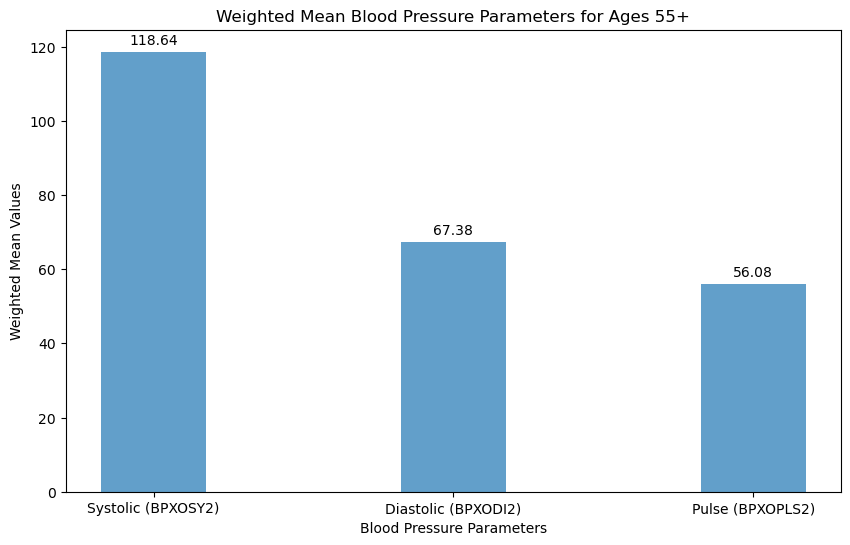

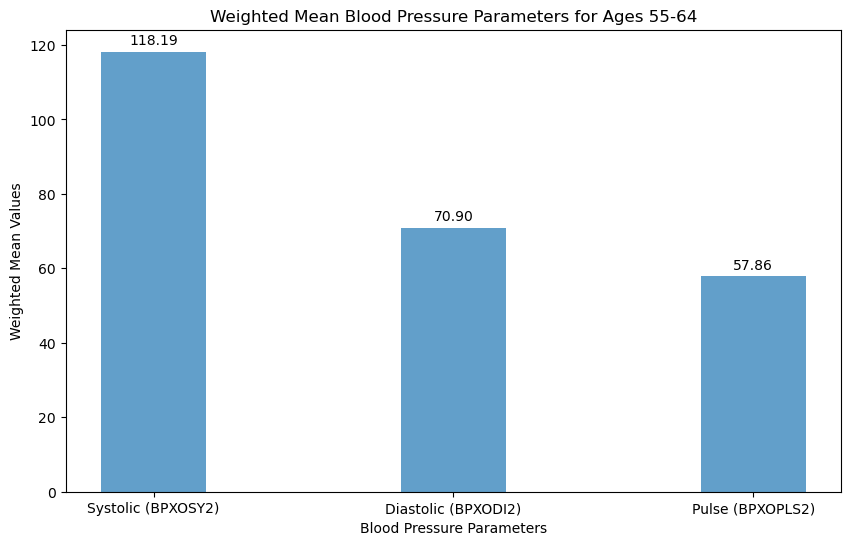

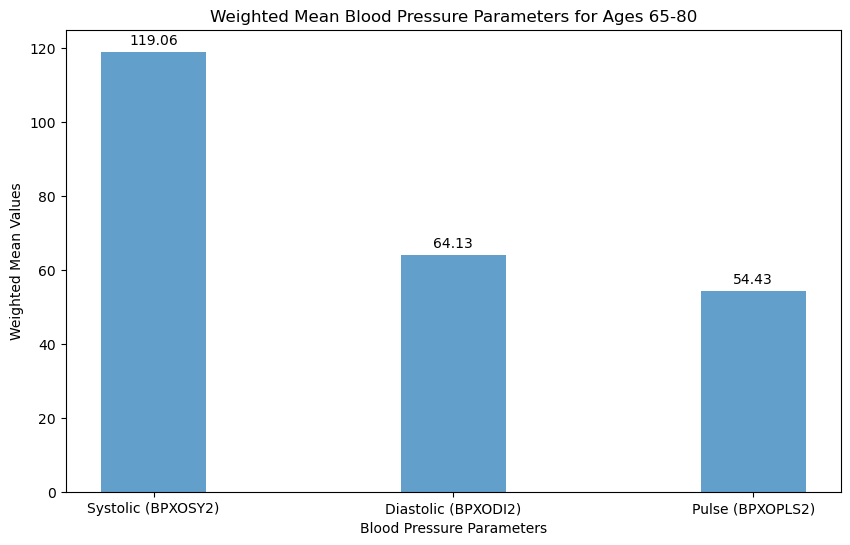

In [57]:
# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

# Dictionary to map column codes to label names
column_labels = {
    "BPXOSY2": "Systolic Blood Pressure",
    "BPXODI2": "Diastolic Blood Pressure",
    "BPXOPLS2": "Pulse Counts"
}

for age_range in age_ranges:
    # Filtering data based on age range
    if np.isinf(age_range[1]):
        filtered_data = merged_df[(merged_df["RIDAGEYR"] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        filtered_data = merged_df[(merged_df["RIDAGEYR"] >= age_range[0]) & (merged_df["RIDAGEYR"] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    # Blood pressure parameters
    bp_data = filtered_data[["BPXOSY2", "BPXODI2", "BPXOPLS2"]]

    # Weighted means
    total_weights = filtered_data["WTINTPRP"].sum()
    weighted_means = bp_data.multiply(filtered_data["WTINTPRP"], axis=0).sum() / total_weights

    labels = ["Systolic (BPXOSY2)", "Diastolic (BPXODI2)", "Pulse (BPXOPLS2)"]

    x = range(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, weighted_means, width, alpha=0.7)
    plt.xlabel('Blood Pressure Parameters')
    plt.ylabel('Weighted Mean Values')
    plt.title(f'Weighted Mean Blood Pressure Parameters for {title_age_range}')
    plt.xticks([i for i in x], labels)

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.show()


- ### Age and Gender 

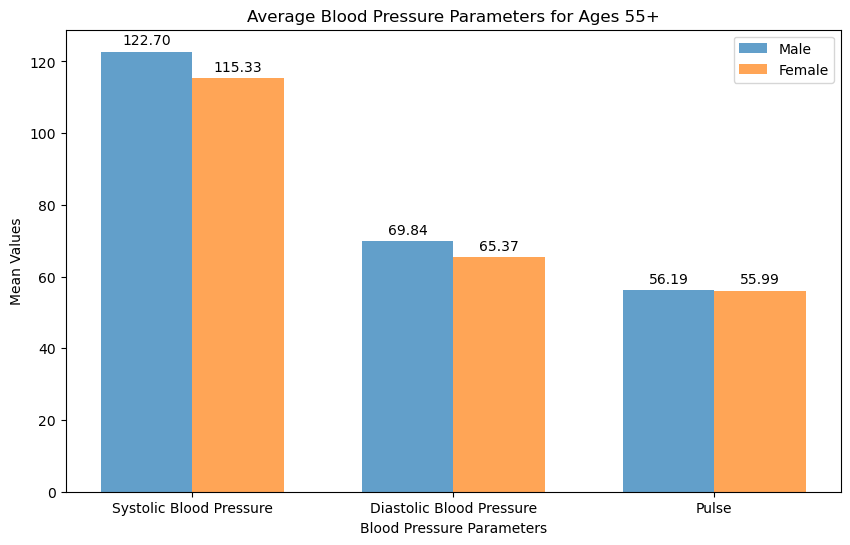

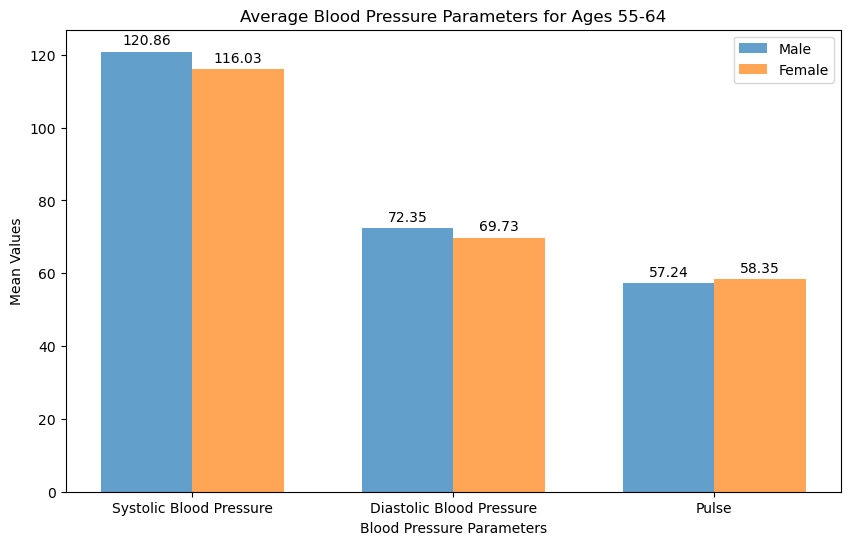

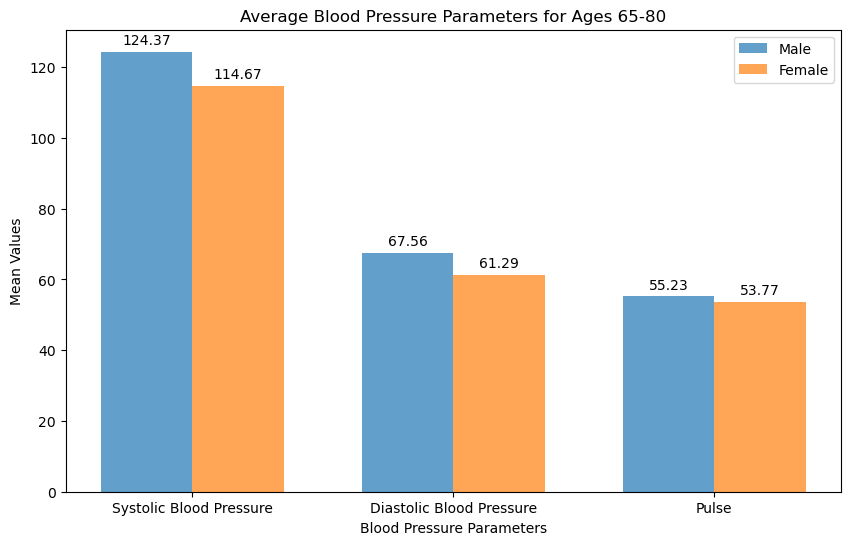

In [58]:
# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

labels = ["BPXOSY2", "BPXODI2", "BPXOPLS2"]

# Dictionary to map codes to label names
label_dict = {
    "BPXOSY2": "Systolic Blood Pressure",
    "BPXODI2": "Diastolic Blood Pressure",
    "BPXOPLS2": "Pulse"
}

for age_range in age_ranges:
    # Filtering data based on age range
    if np.isinf(age_range[1]):
        data_age_filtered = merged_df[(merged_df["RIDAGEYR"] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        data_age_filtered = merged_df[(merged_df["RIDAGEYR"] >= age_range[0]) & (merged_df["RIDAGEYR"] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    # Male and female data for the age range
    male_data = data_age_filtered[data_age_filtered["RIAGENDR"] == 1]  # 1: male
    female_data = data_age_filtered[data_age_filtered["RIAGENDR"] == 2]  # 2: female

    # Weighted mean values 
    male_weighted_means = [(male_data[label] * male_data["WTINTPRP"]).sum() / male_data["WTINTPRP"].sum() for label in labels]
    female_weighted_means = [(female_data[label] * female_data["WTINTPRP"]).sum() / female_data["WTINTPRP"].sum() for label in labels]

    x = range(len(labels))
    width = 0.35

    # Bar plots 
    plt.figure(figsize=(10, 6))
    bar1 = plt.bar(x, male_weighted_means, width, label='Male', alpha=0.7)
    bar2 = plt.bar([i + width for i in x], female_weighted_means, width, label='Female', alpha=0.7)

    plt.xlabel('Blood Pressure Parameters')
    plt.ylabel('Mean Values')
    plt.title(f'Average Blood Pressure Parameters for {title_age_range}')
    plt.xticks([i + width / 2 for i in x], [label_dict[label] for label in labels])
    plt.legend()

  
    for bars in [bar1, bar2]:
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.show()


- ### Age and Race 

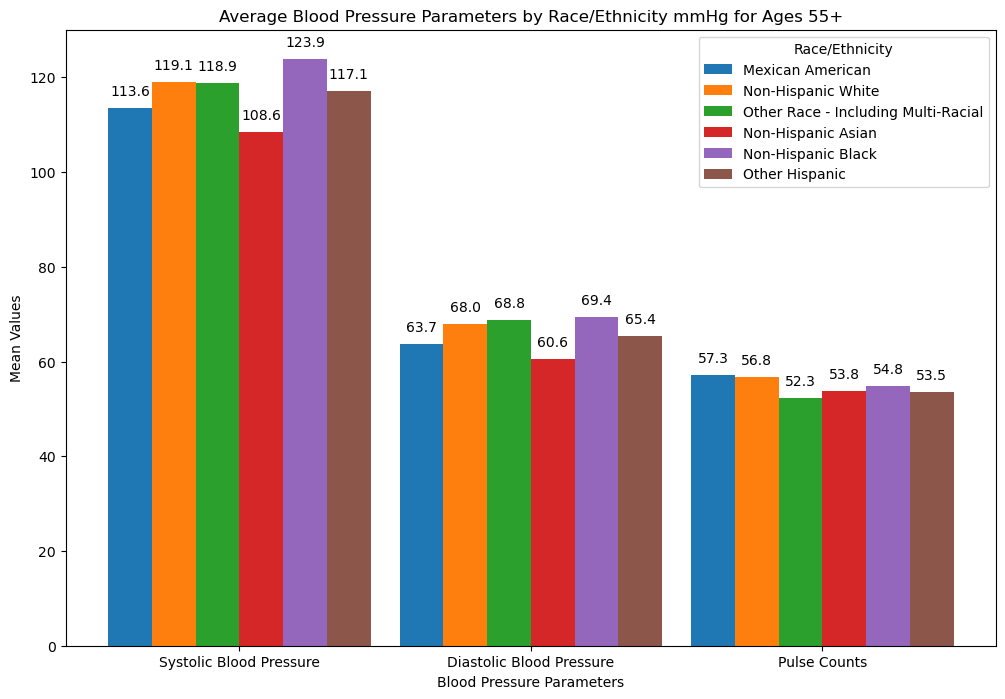

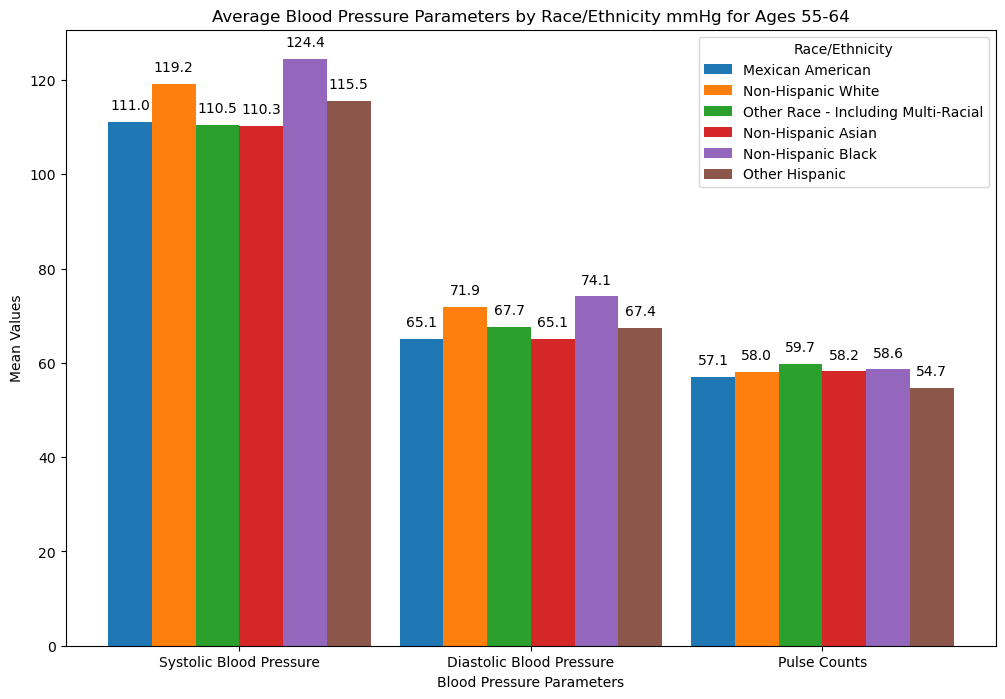

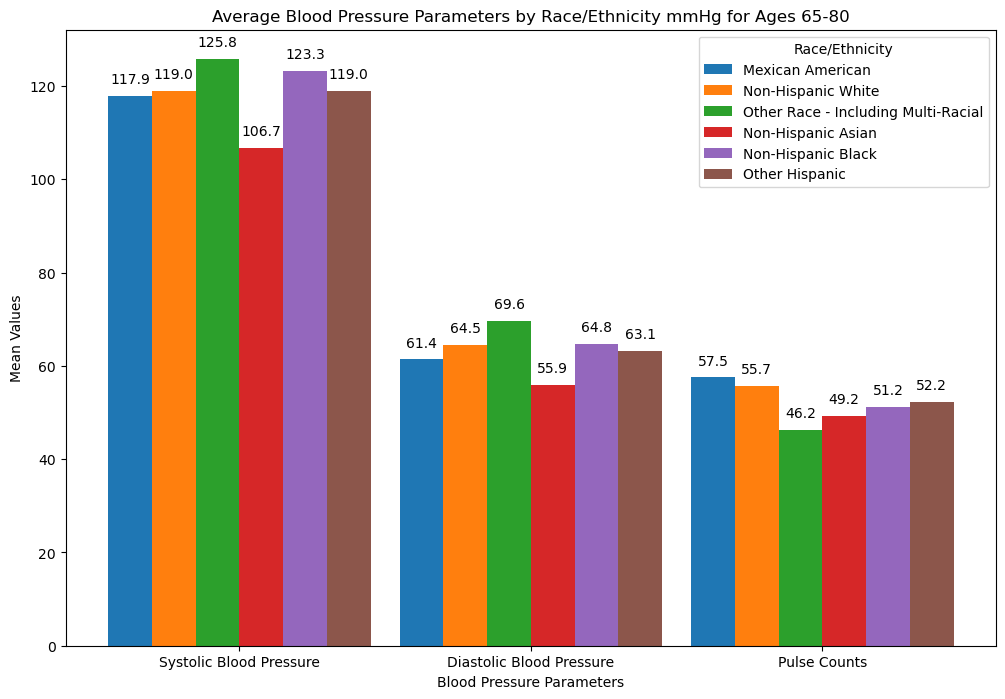

In [59]:
# Unique ethnicities
races = merged_df["RIDRETH3"].unique()
labels = ["BPXOSY2", "BPXODI2", "BPXOPLS2"]

# Dictionary to map column codes to label names
column_labels = {
    "BPXOSY2": "Systolic Blood Pressure",
    "BPXODI2": "Diastolic Blood Pressure",
    "BPXOPLS2": "Pulse Counts"
}

# Dictionary to map race codes to label names
race_labels = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    6: "Non-Hispanic Asian",
    7: "Other Race - Including Multi-Racial"
}

# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

for age_range in age_ranges:
    # Filtering data based on age range
    if np.isinf(age_range[1]):
        data_age_filtered = merged_df[(merged_df["RIDAGEYR"] >= age_range[0])]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        data_age_filtered = merged_df[(merged_df["RIDAGEYR"] >= age_range[0]) & (merged_df["RIDAGEYR"] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    data_age_filtered = data_age_filtered[["RIDRETH3"] + labels + ["WTINTPRP"]]

    num_bars = len(races)
    bar_width = 0.15
    index = np.arange(len(labels))

    plt.figure(figsize=(12, 8))

    for i, race in enumerate(races):
        race_data = data_age_filtered[data_age_filtered["RIDRETH3"] == race]

       
        race_label = race_labels.get(race, f"Race {race}")

        # Weighted means for each parameter within each race group
        race_weighted_means = []
        for label in labels:
            weighted_mean = (race_data[label] * race_data["WTINTPRP"]).sum() / race_data["WTINTPRP"].sum()
            race_weighted_means.append(weighted_mean)

        bars = plt.bar(index + i * bar_width, race_weighted_means, bar_width, label=race_label)

        for j, bar, value in zip(range(len(labels)), bars, race_weighted_means):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value:.1f}', ha='center', va='bottom')

    plt.xlabel('Blood Pressure Parameters')
    plt.ylabel('Mean Values')
    plt.title(f'Average Blood Pressure Parameters by Race/Ethnicity mmHg for {title_age_range}')
    plt.xticks(index + (num_bars / 2 - 0.5) * bar_width, [column_labels[label] for label in labels])
    plt.legend(title='Race/Ethnicity', loc='upper right')

    plt.show()


# Cholesterol: 55+,55-64,65-80 

- ### Age 

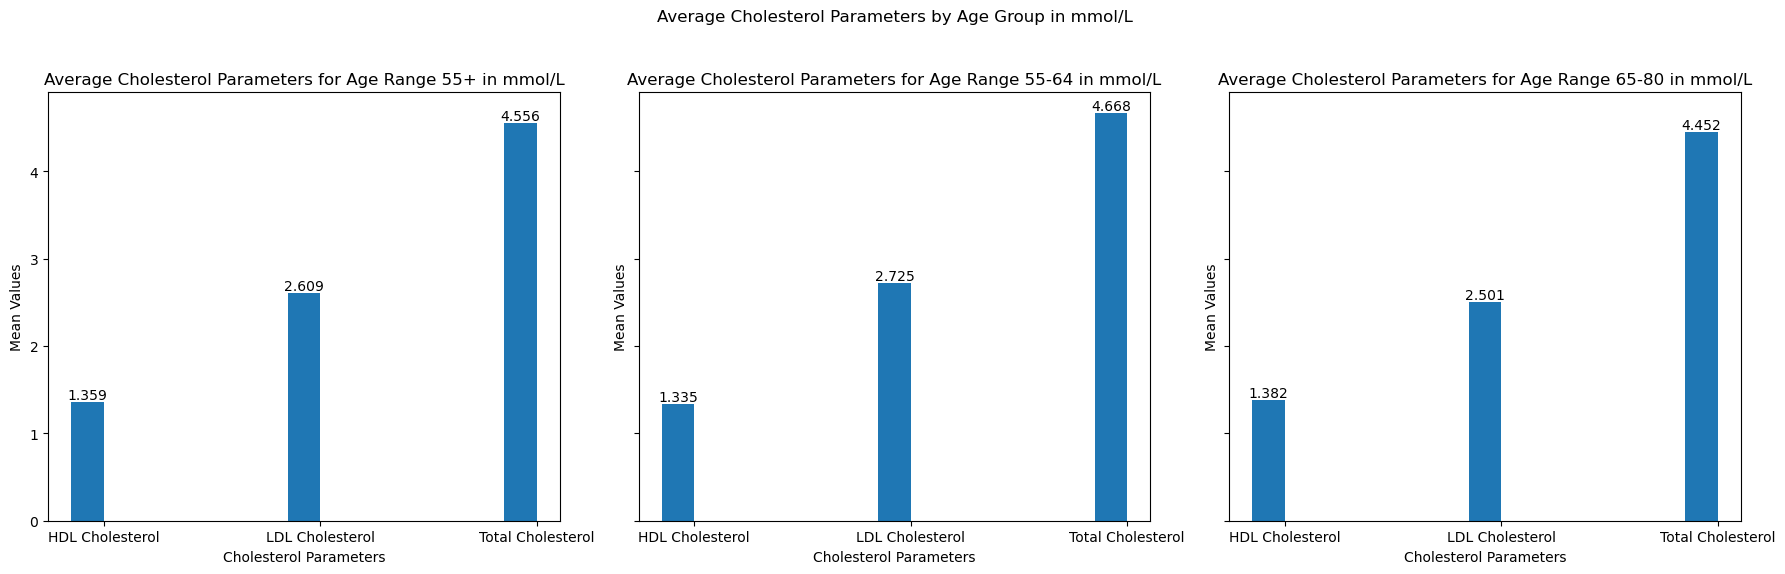

In [60]:
cholesterol_labels = ["LBDHDDSI", "LBDLDLSI", "LBDTCSI"]

# Dictionary to map column codes to label names
column_labels = {
    "LBDHDDSI": "HDL Cholesterol",
    "LBDLDLSI": "LDL Cholesterol",
    "LBDTCSI": "Total Cholesterol"
}

# Age ranges
data_55_plus = merged_df[merged_df["RIDAGEYR"] >= 55]
data_55_64 = merged_df[(merged_df["RIDAGEYR"] >= 55) & (merged_df["RIDAGEYR"] <= 64)]
data_65_80 = merged_df[(merged_df["RIDAGEYR"] >= 65) & (merged_df["RIDAGEYR"] <= 80)]

datasets = [data_55_plus, data_55_64, data_65_80]
labels = ['55+', '55-64', '65-80']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
fig.suptitle('Average Cholesterol Parameters by Age Group in mmol/L')

for ax, data, label in zip(axes.flatten(), datasets, labels):
    data = data[cholesterol_labels + ["WTINTPRP"]]

    num_bars = len(cholesterol_labels)
    bar_width = 0.15
    index = np.arange(len(cholesterol_labels))

    # weighted means for each cholesterol parameter
    age_weighted_means = []
    for chol_label in cholesterol_labels:
        weighted_mean = (data[chol_label] * data["WTINTPRP"]).sum() / data["WTINTPRP"].sum()
        age_weighted_means.append(weighted_mean)

    bars = ax.bar(index, age_weighted_means, bar_width)

    for j, bar, value in zip(range(len(cholesterol_labels)), bars, age_weighted_means):
        ax.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.3f}', ha='center', va='bottom')

    ax.set_xlabel('Cholesterol Parameters')
    ax.set_title(f'Average Cholesterol Parameters for Age Range {label} in mmol/L')
    ax.set_ylabel('Mean Values')  


    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([column_labels[chol_label] for chol_label in cholesterol_labels])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- ### Age and Gender 

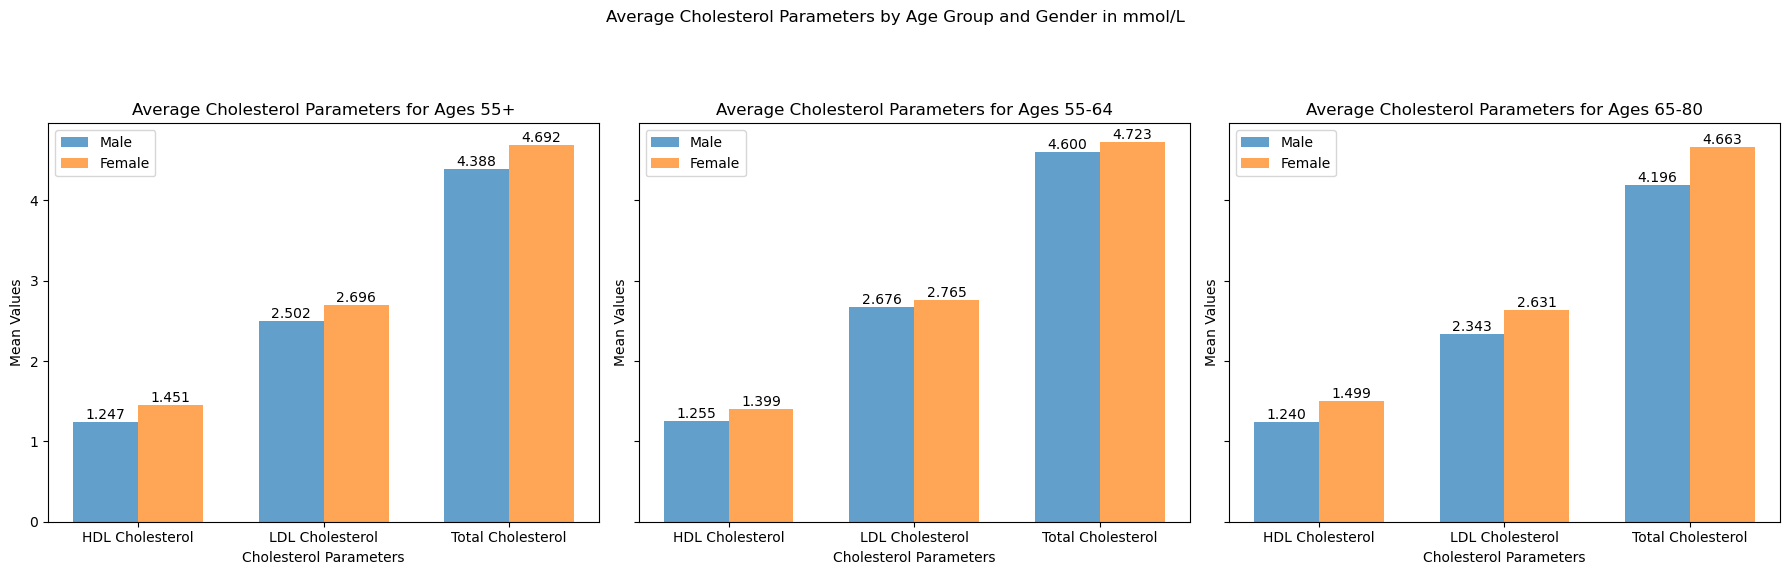

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Cholesterol labels
cholesterol_labels = ["LBDHDDSI", "LBDLDLSI", "LBDTCSI"]

# Dictionary to map column codes to label names
column_labels = {
    "LBDHDDSI": "HDL Cholesterol",
    "LBDLDLSI": "LDL Cholesterol",
    "LBDTCSI": "Total Cholesterol"
}

# Age ranges
age_ranges = [
    (55, np.inf),  # 55+
    (55, 64),      # 55-64
    (65, 80)       # 65-80
]

# subplots for each age range
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
fig.suptitle('Average Cholesterol Parameters by Age Group and Gender in mmol/L')

for ax, age_range in zip(axes, age_ranges):
    # Filtering data based on age range
    if np.isinf(age_range[1]):
        data_age_filtered = merged_df[merged_df["RIDAGEYR"] >= age_range[0]]
        title_age_range = f'Ages {age_range[0]}+'
    else:
        data_age_filtered = merged_df[(merged_df["RIDAGEYR"] >= age_range[0]) & (merged_df["RIDAGEYR"] <= age_range[1])]
        title_age_range = f'Ages {age_range[0]}-{age_range[1]}'

    # data by gender
    male_data = data_age_filtered[data_age_filtered["RIAGENDR"] == 1]  # 1: male
    female_data = data_age_filtered[data_age_filtered["RIAGENDR"] == 2]  # 2: female

    # Weighted mean values
    male_weighted_means = [(male_data[label] * male_data["WTINTPRP"]).sum() / male_data["WTINTPRP"].sum() for label in cholesterol_labels]
    female_weighted_means = [(female_data[label] * female_data["WTINTPRP"]).sum() / female_data["WTINTPRP"].sum() for label in cholesterol_labels]

    x = np.arange(len(cholesterol_labels))
    bar_width = 0.35

    # Bar plots
    ax.bar(x - bar_width / 2, male_weighted_means, bar_width, label='Male', alpha=0.7)
    ax.bar(x + bar_width / 2, female_weighted_means, bar_width, label='Female', alpha=0.7)

    ax.set_xlabel('Cholesterol Parameters')
    ax.set_ylabel('Mean Values')
    ax.set_title(f'Average Cholesterol Parameters for {title_age_range}')
    ax.set_xticks(x)
    ax.set_xticklabels([column_labels[label] for label in cholesterol_labels])
    ax.legend()

    for i, value in enumerate(male_weighted_means):
        ax.text(x[i] - bar_width / 2, value, f'{value:.3f}', ha='center', va='bottom')
    for i, value in enumerate(female_weighted_means):
        ax.text(x[i] + bar_width / 2, value, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


- ### Age and Race 

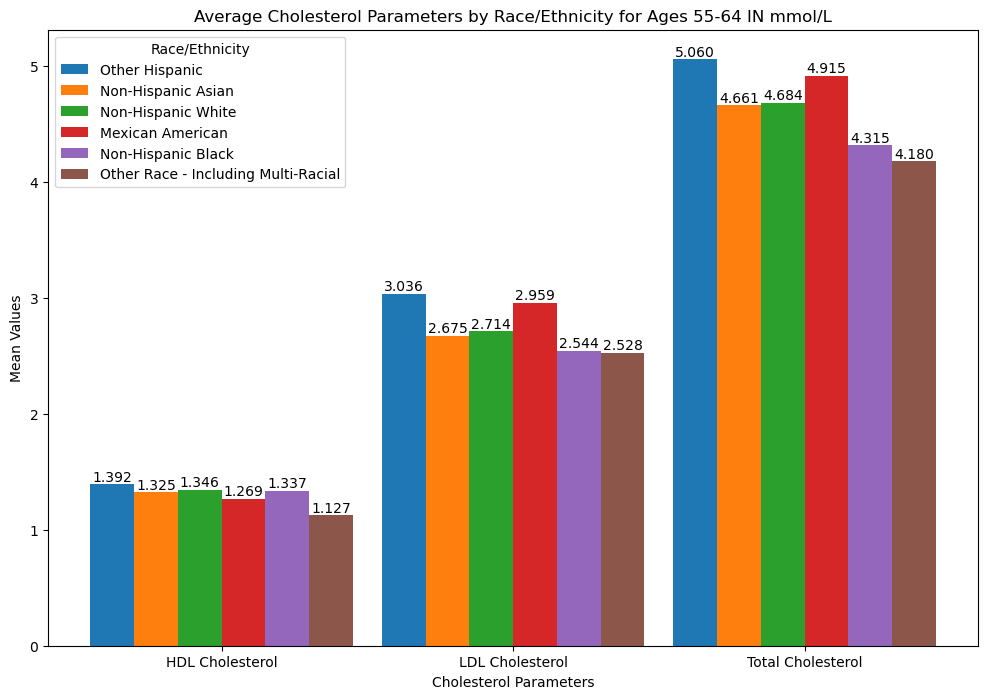

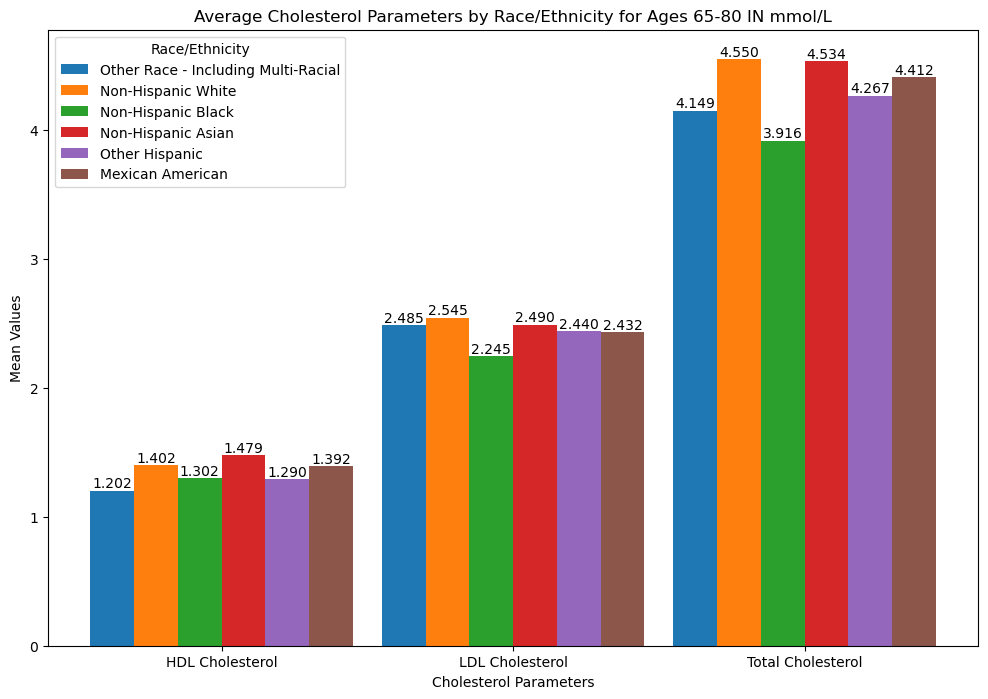

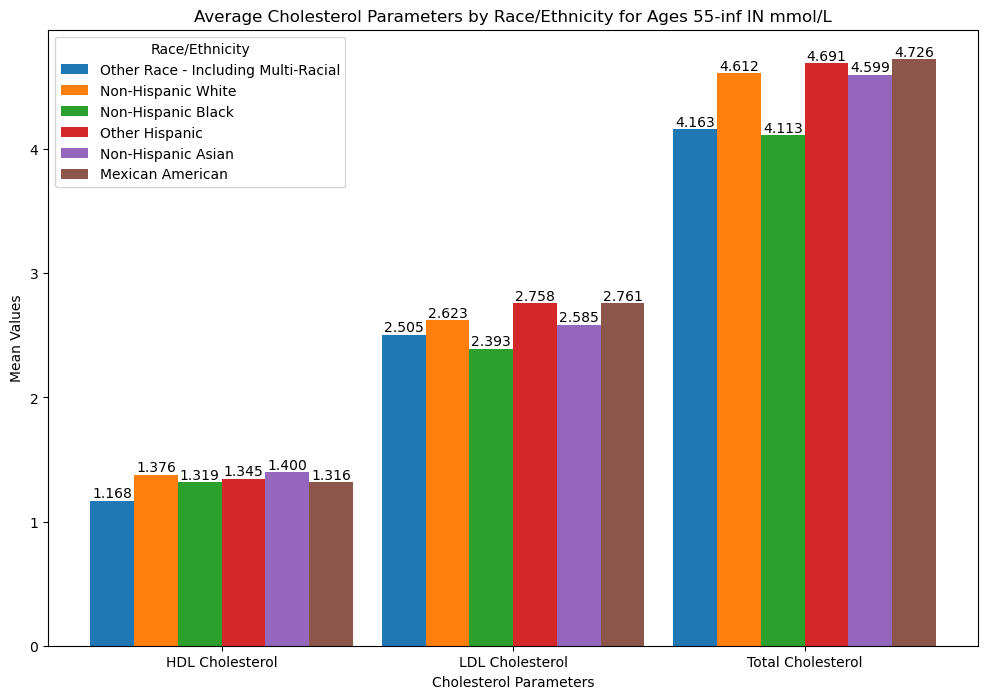

In [62]:
def plot_cholesterol_by_race(data, age_range, cholesterol_labels, race_labels, column_labels):
    # Filtering data based on age range
    data_age_filtered = merged_df[(data["RIDAGEYR"] >= age_range[0]) & (merged_df["RIDAGEYR"] <= age_range[1])]

    num_bars = len(data_age_filtered["RIDRETH3"].unique())
    bar_width = 0.15
    index = np.arange(len(cholesterol_labels))

    plt.figure(figsize=(12, 8))

    for i, race in enumerate(data_age_filtered["RIDRETH3"].unique()):
        race_data = data_age_filtered[data_age_filtered["RIDRETH3"] == race]

        # race label-legend
        race_label = race_labels.get(race, f"Race {race}")

        # Calculate the weighted means for each cholesterol parameter within each race group
        race_weighted_means = []
        for label in cholesterol_labels:
            weighted_mean = (race_data[label] * race_data["WTINTPRP"]).sum() / race_data["WTINTPRP"].sum()
            race_weighted_means.append(weighted_mean)

        bars = plt.bar(index + i * bar_width, race_weighted_means, bar_width, label=race_label)

        for j, bar, value in zip(range(len(cholesterol_labels)), bars, race_weighted_means):
            plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.3f}', ha='center', va='bottom')

    plt.xlabel('Cholesterol Parameters')
    plt.ylabel('Mean Values')
    plt.title(f'Average Cholesterol Parameters by Race/Ethnicity for Ages {age_range[0]}-{age_range[1]} IN mmol/L')
    plt.xticks(index + (num_bars / 2 - 0.5) * bar_width, [column_labels[label] for label in cholesterol_labels])
    plt.legend(title='Race/Ethnicity', loc='upper left')

    plt.show()

# different age ranges
plot_cholesterol_by_race(merged_df, (55, 64), cholesterol_labels, race_labels, column_labels)
plot_cholesterol_by_race(merged_df, (65, 80), cholesterol_labels, race_labels, column_labels)
plot_cholesterol_by_race(merged_df, (55, np.inf), cholesterol_labels, race_labels, column_labels)


# Results Table

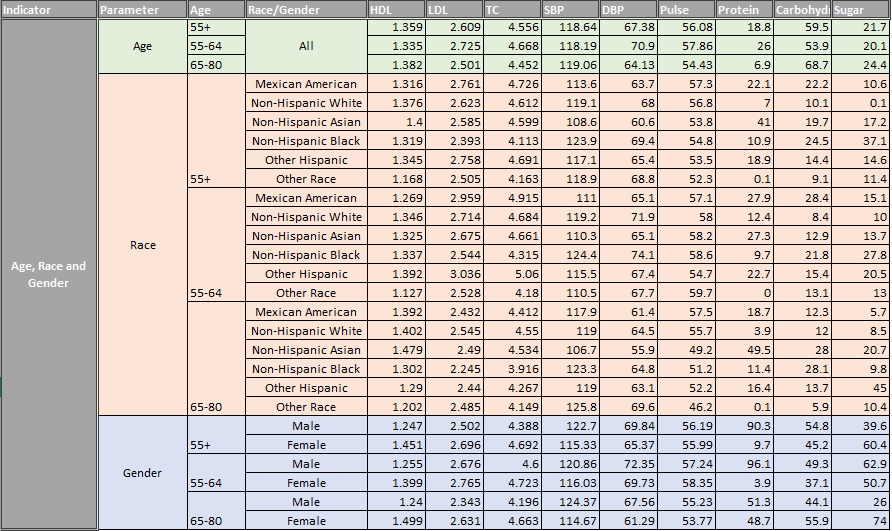

In [63]:
from IPython.display import Image
Image(filename='results_table.png')

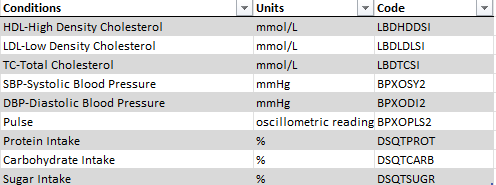

In [64]:
#units reference
from IPython.display import Image
Image(filename='units.png')